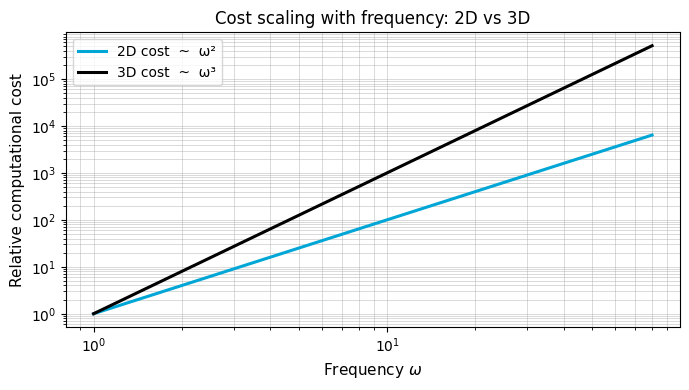

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# TU Delft colors
# ---------------------------------------
tud_cyan = '#00A6D6'
tud_black = '#000000'
tud_grey = '#A7A8AA'

# ---------------------------------------
# Frequency range
# ---------------------------------------
omega = np.linspace(1, 80, 300)

# Cost scaling
cost_2d = omega**2
cost_3d = omega**3

# Normalize so both start at 1 (for visual clarity)
cost_2d /= cost_2d[0]
cost_3d /= cost_3d[0]

# ---------------------------------------
# Plot
# ---------------------------------------
plt.figure(figsize=(7, 4))

plt.loglog(omega, cost_2d, label='2D cost  ~  ω²', color=tud_cyan, linewidth=2.2)
plt.loglog(omega, cost_3d, label='3D cost  ~  ω³', color=tud_black, linewidth=2.2)

plt.xlabel(r'Frequency $\omega$', fontsize=11)
plt.ylabel('Relative computational cost', fontsize=11)
plt.title('Cost scaling with frequency: 2D vs 3D', fontsize=12)

plt.grid(True, which='both', color=tud_grey, linewidth=0.5, alpha=0.6)
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()

# Save for slide use
plt.savefig('cost_scaling_2D_vs_3D_TUD.png', dpi=300, bbox_inches='tight')
# plt.show()


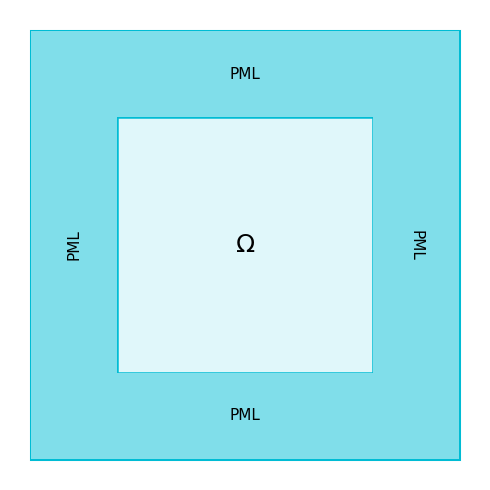

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -----------------------------
# Custom colors (tweak as needed)
# -----------------------------
cyan = "#00bcd4"           # Cyan
light_cyan = "#80deea"     # Light cyan
lighter_cyan = "#e0f7fa"   # Lighter cyan

# -----------------------------
# Parameters
# -----------------------------
Lx, Ly = 1.0, 1.0
pml_thickness = 0.2

x0 = pml_thickness
y0 = pml_thickness
width_phys = Lx - 2 * pml_thickness
height_phys = Ly - 2 * pml_thickness

fig, ax = plt.subplots(figsize=(5, 5))

# -----------------------------
# Outer domain frame (cyan)
# -----------------------------
outer_rect = Rectangle(
    (0, 0), Lx, Ly,
    edgecolor=cyan, facecolor="none", linewidth=2.2
)
ax.add_patch(outer_rect)

# -----------------------------
# Physical domain (lighter cyan)
# -----------------------------
phys_rect = Rectangle(
    (x0, y0), width_phys, height_phys,
    edgecolor=cyan, facecolor=lighter_cyan, linewidth=1.8
)
ax.add_patch(phys_rect)

# -----------------------------
# PML regions (light cyan)
# -----------------------------
# Left
ax.add_patch(Rectangle(
    (0, 0), pml_thickness, Ly,
    edgecolor="none", facecolor=light_cyan
))
# Right
ax.add_patch(Rectangle(
    (Lx - pml_thickness, 0), pml_thickness, Ly,
    edgecolor="none", facecolor=light_cyan
))
# Bottom
ax.add_patch(Rectangle(
    (0, 0), Lx, pml_thickness,
    edgecolor="none", facecolor=light_cyan
))
# Top
ax.add_patch(Rectangle(
    (0, Ly - pml_thickness), Lx, pml_thickness,
    edgecolor="none", facecolor=light_cyan
))

# -----------------------------
# Labels
# -----------------------------
ax.text(
    x0 + width_phys/2, y0 + height_phys/2,
    r"$\Omega$", fontsize=18,
    ha="center", va="center", color="black"
)

ax.text(pml_thickness/2, Ly/2, "PML",
        ha="center", va="center", rotation=90, fontsize=11)
ax.text(Lx - pml_thickness/2, Ly/2, "PML",
        ha="center", va="center", rotation=270, fontsize=11)
ax.text(Lx/2, pml_thickness/2, "PML",
        ha="center", va="center", fontsize=11)
ax.text(Lx/2, Ly - pml_thickness/2, "PML",
        ha="center", va="center", fontsize=11)

ax.set_xlim(-0.05, Lx + 0.05)
ax.set_ylim(-0.05, Ly + 0.05)
ax.set_aspect("equal", "box")
ax.axis("off")

plt.tight_layout()
plt.savefig("domain_with_pml_cyan_schematic.png", dpi=300, bbox_inches="tight")
# plt.show()


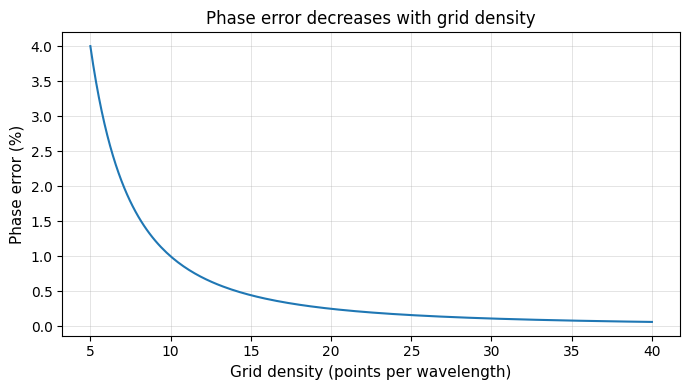

In [5]:
# ---------------------------------------------------
# Grid density: points per wavelength
# ---------------------------------------------------
density = np.linspace(5, 40, 200)  # from 5 to 40 pts/λ

# Synthetic phase error model:
# For example: error ~ 1 / (density^2)
phase_error = 1.0 / density**2

# Optionally scale to percentages
phase_error_percent = 100 * phase_error

# ---------------------------------------------------
# Plot
# ---------------------------------------------------
plt.figure(figsize=(7, 4))

plt.plot(density, phase_error_percent)

plt.xlabel("Grid density (points per wavelength)", fontsize=11)
plt.ylabel("Phase error (%)", fontsize=11)
plt.title("Phase error decreases with grid density", fontsize=12)

plt.grid(True, linewidth=0.4, alpha=0.6)
plt.tight_layout()

# Save for your presentation
plt.savefig("phase_error_vs_grid_density.png", dpi=300, bbox_inches="tight")
# plt.show()


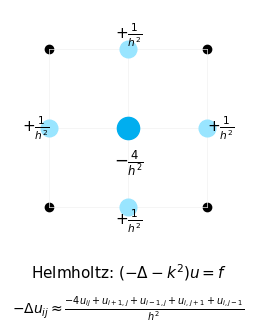

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------
# TU Delft color palette (core subset)
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"   # primary cyan
TUDELFT_CYAN_LIGHT  = "#99E5FF"   # lighter cyan (custom, for contrast)
TUDELFT_GREY_LIGHT  = "#F2F2F2"   # light grey background/grid if needed

# -------------------------------------------------
# 5-point Laplacian stencil visualisation
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(4, 4))

# 3x3 grid
xs = np.arange(3)
ys = np.arange(3)

for x in xs:
    for y in ys:
        ax.plot(x, y, 'o', markersize=6, color="black")

# Grid lines (light grey)
for x in xs:
    ax.plot([x, x], [0, 2], '-', linewidth=0.5, color=TUDELFT_GREY_LIGHT)
for y in ys:
    ax.plot([0, 2], [y, y], '-', linewidth=0.5, color=TUDELFT_GREY_LIGHT)

# Stencil nodes
cx, cy = 1, 1  # center
ax.plot(cx, cy, 'o', markersize=16, color=TUDELFT_CYAN)          # center node
neighbors = [(0, 1), (2, 1), (1, 0), (1, 2)]
for (nx, ny) in neighbors:
    ax.plot(nx, ny, 'o', markersize=12, color=TUDELFT_CYAN_LIGHT)

# Coefficient labels for -Δu
ax.text(cx, cy - 0.25,
        r"$-\frac{4}{h^2}$",
        ha="center", va="top", fontsize=12)

ax.text(0, 1, r"$+\frac{1}{h^2}$", ha="right",  va="center", fontsize=11)
ax.text(2, 1, r"$+\frac{1}{h^2}$", ha="left",   va="center", fontsize=11)
ax.text(1, 2, r"$+\frac{1}{h^2}$", ha="center", va="bottom", fontsize=11)
ax.text(1, 0, r"$+\frac{1}{h^2}$", ha="center", va="top",    fontsize=11)

# Helmholtz annotations
ax.text(1, -0.7,
        r"Helmholtz: $(-\Delta - k^2)u = f$",
        ha="center", va="top", fontsize=11)

ax.text(1, -1.1,
        r"$-\Delta u_{ij} \approx \frac{-4u_{ij} + u_{i+1,j} + u_{i-1,j}"
        r" + u_{i,j+1} + u_{i,j-1}}{h^2}$",
        ha="center", va="top", fontsize=10)

# Aesthetics
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-1.4, 2.5)
ax.set_aspect("equal", "box")
ax.axis("off")

plt.savefig("five_point_laplacian_helmholtz_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


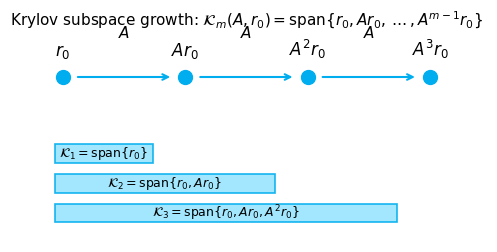

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -------------------------------------------
# TU Delft color palette (basis)
# -------------------------------------------
TUDELFT_CYAN        = "#00AEEF"   # primary cyan
TUDELFT_CYAN_LIGHT  = "#99E5FF"   # lighter cyan
TUDELFT_GREY_LIGHT  = "#F2F2F2"   # light grey

# -------------------------------------------
# Krylov subspace growth diagram
# -------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3))

# x-positions for basis vectors
x_positions = [0, 1.5, 3.0, 4.5]
labels = [r"$r_0$",
          r"$Ar_0$",
          r"$A^2 r_0$",
          r"$A^3 r_0$"]
y_vec = 1.4  # vertical level for vector labels / nodes

# Draw nodes for basis vectors
for x, lab in zip(x_positions, labels):
    ax.plot(x, y_vec, 'o', markersize=10, color=TUDELFT_CYAN)
    ax.text(x, y_vec + 0.25, lab,
            ha="center", va="bottom", fontsize=12)

# Draw arrows between them
for x_start, x_end in zip(x_positions[:-1], x_positions[1:]):
    ax.annotate(
        "",
        xy=(x_end - 0.15, y_vec),
        xytext=(x_start + 0.15, y_vec),
        arrowprops=dict(arrowstyle="->", linewidth=1.5,
                        color=TUDELFT_CYAN)
    )

# Indicate action of A above arrows
midpoints = [(a + b) / 2 for a, b in zip(x_positions[:-1], x_positions[1:])]
for m in midpoints:
    ax.text(m, y_vec + 0.55, r"$A$",
            ha="center", va="bottom", fontsize=11, color="black")

# -------------------------------------------
# Nested Krylov subspaces (K1, K2, K3) - non-overlapping
# -------------------------------------------
height_box = 0.28
x_start = -0.1  # common left edge (to suggest nesting)

K_widths = [1.2, 2.7, 4.2]
K_labels = [
    r"$\mathcal{K}_1 = \mathrm{span}\{r_0\}$",
    r"$\mathcal{K}_2 = \mathrm{span}\{r_0, Ar_0\}$",
    r"$\mathcal{K}_3 = \mathrm{span}\{r_0, Ar_0, A^2 r_0\}$"
]
# Different vertical positions so boxes don't overlap
K_y_positions = [0.1, -0.35, -0.8]

for w, lab, y in zip(K_widths, K_labels, K_y_positions):
    rect = Rectangle(
        (x_start, y),
        w,
        height_box,
        facecolor=TUDELFT_CYAN_LIGHT,
        edgecolor=TUDELFT_CYAN,
        linewidth=1.2,
        alpha=0.9
    )
    ax.add_patch(rect)
    ax.text(
        x_start + w / 2,
        y + height_box / 2,
        lab,
        ha="center", va="center",
        fontsize=9
    )

# -------------------------------------------
# Title / definition
# -------------------------------------------
ax.text(
    2.25, 2.1,
    r"Krylov subspace growth: "
    r"$\mathcal{K}_m(A,r_0) = \mathrm{span}\{r_0, Ar_0, \dots, A^{m-1}r_0\}$",
    ha="center", va="bottom", fontsize=11
)

# Aesthetics
ax.set_xlim(-0.5, 5.2)
ax.set_ylim(-1.1, 2.4)
ax.set_aspect("auto")
ax.axis("off")

plt.savefig("krylov_subspace_growth_tudelft_boxes_separated.png",
            dpi=300, bbox_inches="tight")
plt.show()


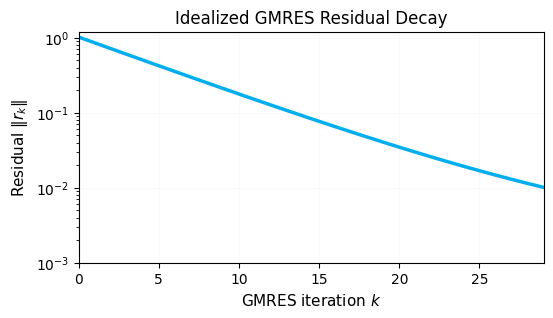

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# TU Delft color palette (consistent with notebook)
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------------
# Ideal GMRES residual decay curve (synthetic)
# -------------------------------------------------
k = np.arange(0, 30)   # GMRES iteration count
# Synthetic monotone decay model: exponential-like
residual = np.exp(-0.18 * k) + 0.02 * np.exp(-0.05 * k)

fig, ax = plt.subplots(figsize=(6, 3))

# Plot
ax.plot(k, residual, linewidth=2.5, color=TUDELFT_CYAN)

# Log scale on y-axis to mimic typical GMRES plots
ax.set_yscale("log")

# Labels
ax.set_xlabel("GMRES iteration $k$", fontsize=11)
ax.set_ylabel(r"Residual $\|r_k\|$", fontsize=11)
ax.set_title("Idealized GMRES Residual Decay", fontsize=12)

# Grid
ax.grid(True, linewidth=0.4, alpha=0.6, color=TUDELFT_GREY_LIGHT)

# Cosmetic limits
ax.set_xlim(0, 29)
ax.set_ylim(1e-3, 1.2)

# Save figure
plt.savefig("ideal_gmres_decay_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


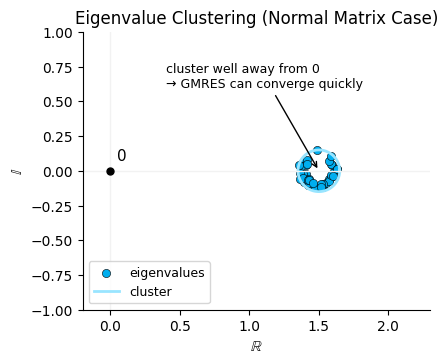

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# TU Delft color palette (keep consistent)
# -------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------
# Synthetic tightly clustered eigenvalues
# Normal-like case: points near a circle away from 0
# -------------------------------------------
np.random.seed(0)

n_eigs = 40
center = 1.5 + 0.0j      # center of cluster on real axis
radius = 0.15            # small spread

angles = 2 * np.pi * np.random.rand(n_eigs)
radii  = radius * (0.6 + 0.4 * np.random.rand(n_eigs))  # a bit of variability

eigs = center + radii * (np.cos(angles) + 1j * np.sin(angles))

fig, ax = plt.subplots(figsize=(4.5, 4.5))

# Plot eigenvalues
ax.scatter(eigs.real, eigs.imag,
           s=35,
           color=TUDELFT_CYAN,
           edgecolor="black",
           linewidth=0.4,
           label="eigenvalues")

# Optional: show an enclosing circle (cluster region)
theta = np.linspace(0, 2*np.pi, 200)
circle_x = center.real + radius * np.cos(theta)
circle_y = center.imag + radius * np.sin(theta)
ax.plot(circle_x, circle_y,
        color=TUDELFT_CYAN_LIGHT,
        linewidth=2,
        label="cluster")

# Axes (complex plane)
ax.axhline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)
ax.axvline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)

# Mark origin
ax.plot(0, 0, 'o', color='black', markersize=5)
ax.text(0.05, 0.05, "0", fontsize=11, ha="left", va="bottom")

# Labels and title
ax.set_xlabel(r"$\mathbb{R}$", fontsize=11)
ax.set_ylabel(r"$\mathbb{I}$", fontsize=11)
ax.set_title("Eigenvalue Clustering (Normal Matrix Case)", fontsize=12)

# Annotation about fast convergence
ax.annotate(
    "cluster well away from 0\n→ GMRES can converge quickly",
    xy=(center.real, center.imag),
    xytext=(0.4, 0.6),
    fontsize=9,
    ha="left",
    arrowprops=dict(arrowstyle="->", linewidth=1)
)

# Aesthetics
ax.set_aspect("equal", "box")
ax.set_xlim(-0.2, 2.3)
ax.set_ylim(-1.0, 1.0)

# Legend placement adjusted to avoid overlap
ax.legend(loc="lower left", fontsize=9)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("eigenvalue_clustering_normal_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


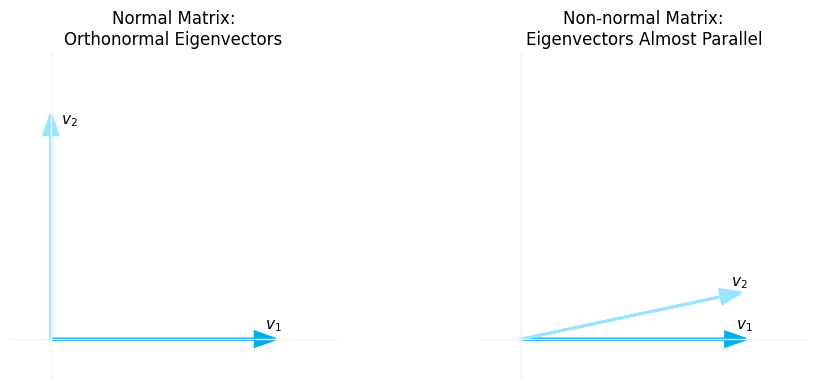

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# TU Delft color palette
# -------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ============================================================
# 1. NORMAL MATRIX CASE — nice orthonormal eigenvectors
# ============================================================
ax = axes[0]

# Orthonormal basis vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# Draw the axes
ax.axhline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)
ax.axvline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)

# Plot vectors
ax.arrow(0, 0, v1[0], v1[1],
         head_width=0.07, head_length=0.1,
         color=TUDELFT_CYAN, linewidth=2)
ax.arrow(0, 0, v2[0], v2[1],
         head_width=0.07, head_length=0.1,
         color=TUDELFT_CYAN_LIGHT, linewidth=2)

# Labels
ax.text(1.05, 0.05, r"$v_1$", fontsize=11, ha="left")
ax.text(0.05, 1.05, r"$v_2$", fontsize=11, ha="left")

ax.set_title("Normal Matrix:\nOrthonormal Eigenvectors", fontsize=12)
ax.set_xlim(-0.2, 1.4)
ax.set_ylim(-0.2, 1.4)
ax.set_aspect("equal")
ax.axis("off")

# ============================================================
# 2. NON-NORMAL CASE — nearly parallel eigenvectors
# ============================================================
ax = axes[1]

# Nearly parallel eigenvectors
angle = np.deg2rad(12)     # small angle between them
v1 = np.array([1, 0])
v2 = np.array([np.cos(angle), np.sin(angle)])

# Draw axes
ax.axhline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)
ax.axvline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)

# Plot vectors
ax.arrow(0, 0, v1[0], v1[1],
         head_width=0.07, head_length=0.1,
         color=TUDELFT_CYAN, linewidth=2)
ax.arrow(0, 0, v2[0], v2[1],
         head_width=0.07, head_length=0.1,
         color=TUDELFT_CYAN_LIGHT, linewidth=2)

# Labels
ax.text(1.05, 0.05, r"$v_1$", fontsize=11, ha="left")
ax.text(v2[0] + 0.05, v2[1] + 0.05, r"$v_2$", fontsize=11, ha="left")

ax.set_title("Non-normal Matrix:\nEigenvectors Almost Parallel", fontsize=12)
ax.set_xlim(-0.2, 1.4)
ax.set_ylim(-0.2, 1.4)
ax.set_aspect("equal")
ax.axis("off")

# Save
plt.tight_layout()
plt.savefig("normal_vs_nonnormal_eigenvectors_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


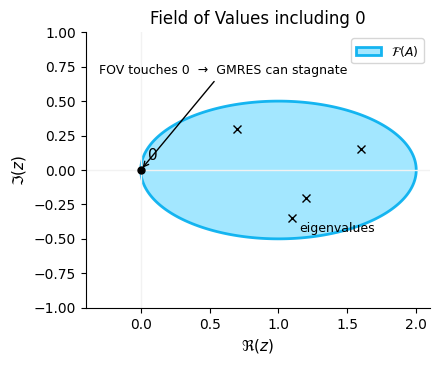

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# TU Delft color palette (same basis)
# -------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------
# Parametric convex region = FOV(A)
# Choose an ellipse whose leftmost point is at 0
# -------------------------------------------
theta = np.linspace(0, 2 * np.pi, 400)

center_x = 1.0          # center on real axis
a = 1.0                 # semi-major axis (real direction)
b = 0.5                 # semi-minor axis (imag direction)

x = center_x + a * np.cos(theta)   # Re(z)
y = b * np.sin(theta)              # Im(z)

fig, ax = plt.subplots(figsize=(4.5, 4.5))

# Fill FOV region
ax.fill(x, y,
        facecolor=TUDELFT_CYAN_LIGHT,
        edgecolor=TUDELFT_CYAN,
        linewidth=2,
        alpha=0.9,
        label=r"$\mathcal{F}(A)$")

# -------------------------------------------
# Axes: complex plane
# -------------------------------------------
# Real axis
ax.axhline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)
# Imag axis
ax.axvline(0, color=TUDELFT_GREY_LIGHT, linewidth=1)

# Mark the origin
ax.plot(0, 0, 'o', color='black', markersize=5)
ax.text(0.05, 0.05, "0", fontsize=11, ha="left", va="bottom")

# Optional: mark some "eigenvalues" away from zero
eig_x = [0.7, 1.2, 1.6, 1.1]
eig_y = [0.3, -0.2, 0.15, -0.35]
ax.plot(eig_x, eig_y, 'x', color='black', markersize=6)
ax.text(1.7, -0.45, "eigenvalues", fontsize=9, ha="right")

# Annotation explaining stagnation
ax.annotate(
    "FOV touches 0  →  GMRES can stagnate",
    xy=(0, 0),
    xytext=(-0.3, 0.7),
    arrowprops=dict(arrowstyle="->", color="black", linewidth=1),
    fontsize=9,
    ha="left"
)

# Labels
ax.set_xlabel(r"$\Re(z)$", fontsize=11)
ax.set_ylabel(r"$\Im(z)$", fontsize=11)
ax.set_title("Field of Values including 0", fontsize=12)

# Aesthetics
ax.set_aspect("equal", "box")
ax.set_xlim(-0.4, 2.1)
ax.set_ylim(-1.0, 1.0)
ax.legend(loc="upper right", fontsize=9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("fov_touching_zero_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


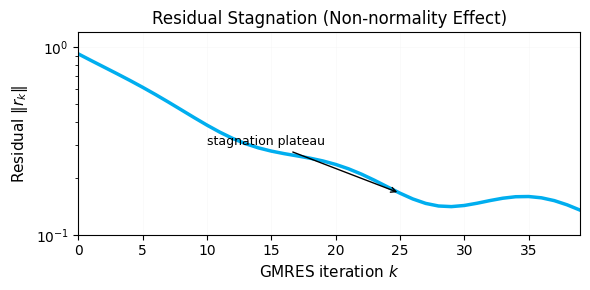

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# TU Delft color palette (consistent across notebook)
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------------
# Synthetic stagnating residual curve (log-scale)
# -------------------------------------------------
k = np.arange(0, 40)

# Behavior: initial decay → stagnation plateau → mild oscillation
residual = (
    0.9**k * 0.8          # initial drop
    + 0.02 * np.sin(0.4*k)   # oscillation
    + 0.12                 # flat stagnation floor
)

fig, ax = plt.subplots(figsize=(6, 3))

# Plot
ax.plot(k, residual, color=TUDELFT_CYAN, linewidth=2.5)

# Log scale emphasizes “not converging further”
ax.set_yscale("log")

# Labels
ax.set_xlabel("GMRES iteration $k$", fontsize=11)
ax.set_ylabel(r"Residual $\|r_k\|$", fontsize=11)
ax.set_title("Residual Stagnation (Non-normality Effect)", fontsize=12)

# Stagnation annotation
ax.annotate(
    "stagnation plateau",
    xy=(25, residual[25]),
    xytext=(10, 0.3),
    fontsize=9,
    arrowprops=dict(arrowstyle="->", linewidth=1),
    ha="left"
)

# Grid
ax.grid(True, linewidth=0.4, alpha=0.6, color=TUDELFT_GREY_LIGHT)

# Aesthetic bounds
ax.set_xlim(0, 39)
ax.set_ylim(1e-1, 1.2)

plt.tight_layout()
plt.savefig("gmres_residual_stagnation_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


### Neural 


C:\Users\31624\AppData\Local\Temp\ipykernel_20280\762176123.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


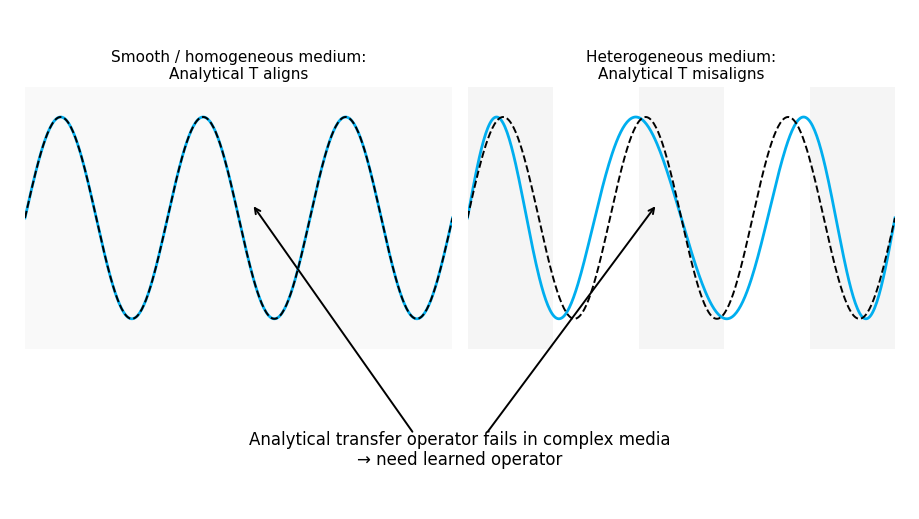

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -------------------------------------------------
# TU Delft palette
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------------
# Synthetic signals
# -------------------------------------------------
x = np.linspace(0, 2 * np.pi, 400)

true_smooth = np.sin(3 * x)
analytic_smooth = np.sin(3 * x)

true_hetero = np.sin(3 * x + 0.7 * np.sin(x))
analytic_hetero = np.sin(3 * x)

# -------------------------------------------------
# Figure with 2×2 layout (bottom row empty)
# -------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(9, 5), height_ratios=[2.5, 1])
ax_smooth = axes[0, 0]
ax_hetero = axes[0, 1]

# Make bottom axes invisible
axes[1, 0].axis("off")
axes[1, 1].axis("off")

# -------------------------------------------------
# Smooth medium (left)
# -------------------------------------------------
ax_smooth.add_patch(Rectangle(
    (x.min(), -1.3), x.max() - x.min(), 2.6,
    facecolor=TUDELFT_GREY_LIGHT, edgecolor="none", alpha=0.4
))
ax_smooth.plot(x, true_smooth, color=TUDELFT_CYAN, linewidth=2)
ax_smooth.plot(x, analytic_smooth, color="black", linestyle="--", linewidth=1.4)
ax_smooth.set_title("Smooth / homogeneous medium:\nAnalytical T aligns", fontsize=11)
ax_smooth.set_ylim(-1.3, 1.3); ax_smooth.set_xlim(x.min(), x.max())
ax_smooth.set_xticks([]); ax_smooth.set_yticks([])
for spine in ax_smooth.spines.values():
    spine.set_visible(False)

# -------------------------------------------------
# Heterogeneous medium (right)
# -------------------------------------------------
layers = 5
layer_width = (x.max() - x.min()) / layers
for i in range(layers):
    if i % 2 == 0:
        ax_hetero.add_patch(Rectangle(
            (x.min() + i * layer_width, -1.3),
            layer_width, 2.6,
            facecolor=TUDELFT_GREY_LIGHT, edgecolor="none", alpha=0.7
        ))

ax_hetero.plot(x, true_hetero, color=TUDELFT_CYAN, linewidth=2)
ax_hetero.plot(x, analytic_hetero, color="black", linestyle="--", linewidth=1.4)
ax_hetero.set_title("Heterogeneous medium:\nAnalytical T misaligns", fontsize=11)
ax_hetero.set_ylim(-1.3, 1.3); ax_hetero.set_xlim(x.min(), x.max())
ax_hetero.set_xticks([]); ax_hetero.set_yticks([])
for spine in ax_hetero.spines.values():
    spine.set_visible(False)

# -------------------------------------------------
# Add bottom text (using figure-level text)
# -------------------------------------------------
fig.text(
    0.5, 0.12,
    "Analytical transfer operator fails in complex media\n→ need learned operator",
    ha="center", va="center", fontsize=12
)

# -------------------------------------------------
# Create a main overlay axis for arrows
# -------------------------------------------------
ax_overlay = fig.add_axes([0, 0, 1, 1])
ax_overlay.axis("off")

# Upward arrows to panels
ax_overlay.annotate(
    "", xy=(0.28, 0.63), xytext=(0.46, 0.17),
    xycoords='figure fraction', textcoords='figure fraction',
    arrowprops=dict(arrowstyle="->", linewidth=1.4)
)
ax_overlay.annotate(
    "", xy=(0.73, 0.63), xytext=(0.54, 0.17),
    xycoords='figure fraction', textcoords='figure fraction',
    arrowprops=dict(arrowstyle="->", linewidth=1.4)
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("schematic_analytical_T_failure_tudelft_fixed.png",
            dpi=300, bbox_inches="tight")
plt.show()


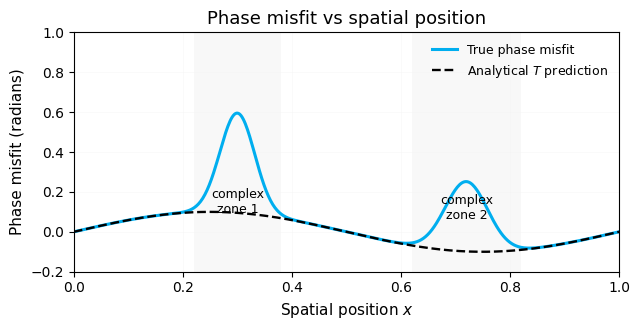

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -------------------------------------------------
# TU Delft palette
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"

# -------------------------------------------------
# Synthetic phase misfit signals
# -------------------------------------------------
x = np.linspace(0, 1, 500)

phase_misfit_analytic = 0.1 * np.sin(2 * np.pi * x)

bump1 = 0.5 * np.exp(-((x - 0.30) / 0.045)**2)
bump2 = 0.35 * np.exp(-((x - 0.72) / 0.055)**2)

phase_misfit_true = phase_misfit_analytic + bump1 + bump2

complex_intervals = [(0.22, 0.38), (0.62, 0.82)]

# -------------------------------------------------
# Plot
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(6.5, 3.4))

# Shade complex regions
for (x0, x1) in complex_intervals:
    ax.add_patch(Rectangle(
        (x0, -0.2),
        x1 - x0,
        1.3,
        facecolor=TUDELFT_GREY_LIGHT,
        edgecolor="none",
        alpha=0.5,
        zorder=0
    ))

# Curves
ax.plot(x, phase_misfit_true,
        color=TUDELFT_CYAN,
        linewidth=2.2,
        label=r"True phase misfit")

ax.plot(x, phase_misfit_analytic,
        color="black",
        linestyle="--",
        linewidth=1.7,
        label=r"Analytical $T$ prediction")

# Labels and title
ax.set_xlabel("Spatial position $x$", fontsize=11)
ax.set_ylabel("Phase misfit (radians)", fontsize=11)
ax.set_title("Phase misfit vs spatial position", fontsize=13)

# Clean legend placement (top-right)
ax.legend(loc="upper right", fontsize=9, frameon=False)

# Improved annotations below the peaks
ax.text(0.30, 0.15, "complex\nzone 1",
        fontsize=9, ha="center", va="center")

ax.text(0.72, 0.12, "complex\nzone 2",
        fontsize=9, ha="center", va="center")

ax.set_xlim(0, 1)
ax.set_ylim(-0.2, 1.0)

ax.grid(True, linewidth=0.4, alpha=0.6, color=TUDELFT_GREY_LIGHT)

plt.tight_layout()
plt.savefig("phase_misfit_vs_position_no_overlap_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


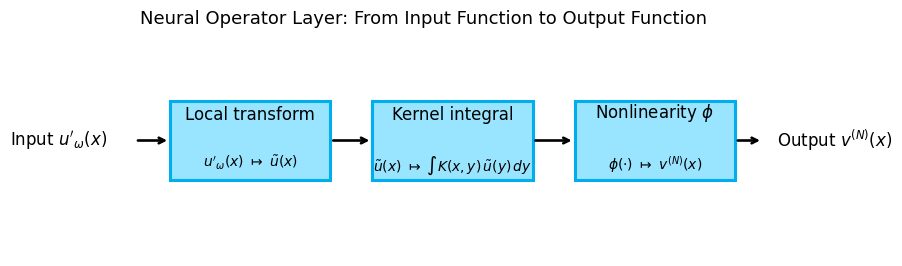

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -------------------------------------------------
# TU Delft palette
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"

# -------------------------------------------------
# Neural Operator Layer Diagram (no clipping)
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 3.0))
ax.axis("off")

# Axes-fraction coordinate system (0–1)
y_block = 0.5
block_h = 0.34
block_w = 0.23      # slightly narrower so everything fits
gap     = 0.06

x_local     = 0.12
x_kernel    = x_local + block_w + gap
x_nonlinear = x_kernel + block_w + gap

# Draw a block in axes-coordinates
def draw_block(x, y, w, h, title, subtitle):
    rect = Rectangle(
        (x, y - h/2), w, h,
        facecolor=TUDELFT_CYAN_LIGHT,
        edgecolor=TUDELFT_CYAN,
        linewidth=2.2,
        transform=ax.transAxes,
    )
    ax.add_patch(rect)

    ax.text(
        x + w/2, y + 0.07,
        title,
        fontsize=12, ha="center", va="bottom",
        transform=ax.transAxes,
    )
    ax.text(
        x + w/2, y - 0.06,
        subtitle,
        fontsize=10, ha="center", va="top",
        transform=ax.transAxes,
    )

# Blocks
draw_block(
    x_local, y_block, block_w, block_h,
    "Local transform",
    r"$u'_\omega(x)\ \mapsto\ \tilde{u}(x)$"
)
draw_block(
    x_kernel, y_block, block_w, block_h,
    "Kernel integral",
    r"$\tilde{u}(x)\ \mapsto\ \int K(x,y)\,\tilde{u}(y)\,dy$"
)
draw_block(
    x_nonlinear, y_block, block_w, block_h,
    r"Nonlinearity $\phi$",
    r"$\phi(\cdot)\ \mapsto\ v^{(N)}(x)$"
)

# Arrow helper
def arrow(from_x, to_x, y):
    ax.annotate(
        "",
        xy=(to_x, y),
        xytext=(from_x, y),
        xycoords="axes fraction",
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="->", lw=1.9, color="black"),
    )

# Arrows between blocks
arrow(x_local + block_w, x_kernel, y_block)
arrow(x_kernel + block_w, x_nonlinear, y_block)

# Input label + arrow
ax.text(
    x_local - 0.09, y_block,
    r"Input $u'_\omega(x)$",
    fontsize=12, ha="right", va="center",
    transform=ax.transAxes,
)
arrow(x_local - 0.05, x_local, y_block)

# Output label + arrow (kept strictly inside [0,1])
arrow(x_nonlinear + block_w, x_nonlinear + block_w + 0.04, y_block)
ax.text(
    x_nonlinear + block_w + 0.06, y_block,
    r"Output $v^{(N)}(x)$",
    fontsize=12, ha="left", va="center",
    transform=ax.transAxes,
)

# Title
fig.text(
    0.5, 0.9,
    "Neural Operator Layer: From Input Function to Output Function",
    ha="center", va="center", fontsize=13
)

# Save & show (no tight cropping → no cut-off)
plt.savefig("neural_operator_layer_diagram_no_clipping.png", dpi=300)
plt.show()


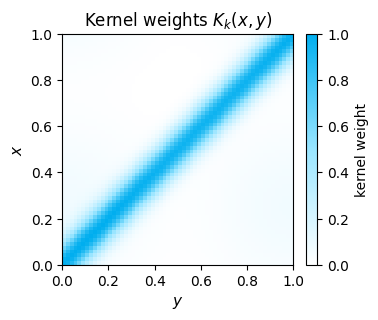

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# -------------------------------------------------
# TU Delft palette
# -------------------------------------------------
TUDELFT_CYAN       = "#00AEEF"
TUDELFT_CYAN_LIGHT = "#99E5FF"

# -------------------------------------------------
# Synthetic kernel K_k(x,y)
#   - strong local interaction along x ≈ y (Gaussian)
#   - plus mild global coupling (outer product)
# -------------------------------------------------
n = 60
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y, indexing="ij")

# Local (diagonal) term
sigma = 0.07
K_local = np.exp(-((X - Y) ** 2) / (2 * sigma**2))

# Global low-rank influence
global_x = 0.3 + 0.2 * np.sin(2 * np.pi * x)
global_y = 0.3 + 0.2 * np.cos(2 * np.pi * y)
K_global = np.outer(global_x, global_y)

# Combine & normalize
K = K_local + 0.3 * K_global
K -= K.min()
K /= K.max()

# -------------------------------------------------
# Custom TU Delft colormap (white → light cyan → cyan)
# -------------------------------------------------
cmap = LinearSegmentedColormap.from_list(
    "tudelft_cyan_map",
    ["white", TUDELFT_CYAN_LIGHT, TUDELFT_CYAN]
)

# -------------------------------------------------
# Plot heatmap
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(4, 3))

im = ax.imshow(
    K,
    origin="lower",
    extent=[0, 1, 0, 1],
    cmap=cmap,
    aspect="equal"
)

ax.set_xlabel(r"$y$", fontsize=11)
ax.set_ylabel(r"$x$", fontsize=11)
ax.set_title(r"Kernel weights $K_k(x,y)$", fontsize=12)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("kernel weight", fontsize=10)

plt.savefig("kernel_weight_heatmap_tudelft.png",
            dpi=300, bbox_inches="tight")
plt.show()


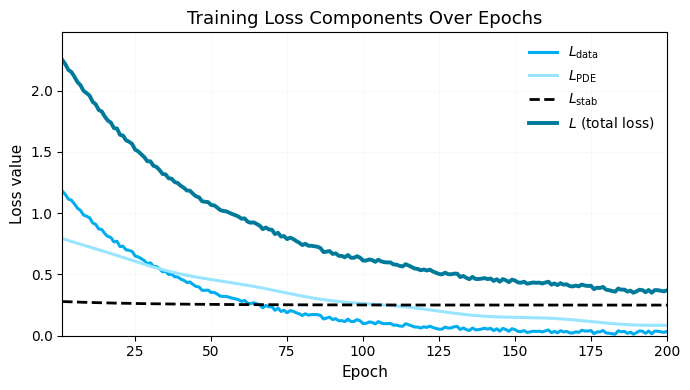

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# TU Delft palette
# -------------------------------------------------
TUDELFT_CYAN        = "#00AEEF"
TUDELFT_CYAN_LIGHT  = "#99E5FF"
TUDELFT_GREY_LIGHT  = "#F2F2F2"
TUDELFT_DARK        = "#007A9B"   # darker cyan for total loss

# -------------------------------------------------
# Synthetic loss curves
# -------------------------------------------------
epochs = np.arange(1, 201)

L_data = 1.2 * np.exp(-epochs / 40) + 0.03 * np.random.rand(len(epochs))
L_pde  = 0.8 * np.exp(-epochs / 90) + 0.01 * np.sin(epochs / 8)
L_stab = 0.25 + 0.03 * np.exp(-epochs / 30)

L_total = L_data + L_pde + L_stab

# -------------------------------------------------
# Plot
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(epochs, L_data,
        color=TUDELFT_CYAN,
        linewidth=2.2,
        label=r"$L_{\text{data}}$")

ax.plot(epochs, L_pde,
        color=TUDELFT_CYAN_LIGHT,
        linewidth=2.2,
        label=r"$L_{\text{PDE}}$")

ax.plot(epochs, L_stab,
        color="black",
        linestyle="--",
        linewidth=2.0,
        label=r"$L_{\text{stab}}$")

ax.plot(epochs, L_total,
        color=TUDELFT_DARK,
        linewidth=2.8,
        label=r"$L$ (total loss)")

# Labels
ax.set_xlabel("Epoch", fontsize=11)
ax.set_ylabel("Loss value", fontsize=11)
ax.set_title("Training Loss Components Over Epochs", fontsize=13)

# Grid
ax.grid(True, color=TUDELFT_GREY_LIGHT, linewidth=0.5, alpha=0.7)

# Legend
ax.legend(fontsize=10, frameon=False, loc="upper right")

# Aesthetics
ax.set_xlim(1, 200)
ax.set_ylim(0, max(L_total) * 1.1)

plt.tight_layout()
plt.savefig("training_loss_components_tudelft.png", dpi=300)
plt.show()


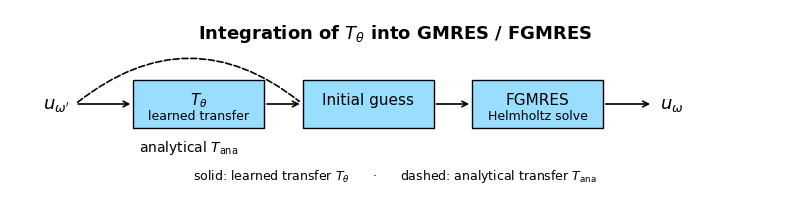

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(8, 2.2))
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 2.5)
ax.axis('off')

# ---- helper to add a box ----
def add_box(x, y, w, h, text, subtext=None):
    rect = Rectangle((x, y), w, h,
                     linewidth=1,
                     edgecolor='black',
                     facecolor='#99ddff')
    ax.add_patch(rect)
    ax.text(x + w/2, y + 0.6*h, text,
            ha='center', va='center', fontsize=11)
    if subtext is not None:
        ax.text(x + w/2, y + 0.25*h, subtext,
                ha='center', va='center', fontsize=9)

# ---- layout parameters ----
box_y = 0
box_h = 1
box_w = 1.7

x_u_low   = 0.6
x_T       = x_u_low + 1.0
x_init    = x_T + box_w + 0.5
x_fgmres  = x_init + box_w + 0.5
x_u_high  = x_fgmres + box_w + 0.9
y_mid     = box_y + box_h/2

# ---- objects ----
# u_{ω'} and u_ω labels
ax.text(x_u_low,  y_mid, r'$u_{\omega^\prime}$',
        ha='center', va='center', fontsize=13)
ax.text(x_u_high, y_mid, r'$u_{\omega}$',
        ha='center', va='center', fontsize=13)

# boxes
add_box(x_T,      box_y, box_w, box_h, r'$T_\theta$', subtext='learned transfer')
add_box(x_init,   box_y, box_w, box_h, 'Initial guess')
add_box(x_fgmres, box_y, box_w, box_h, 'FGMRES', subtext='Helmholtz solve')

# ---- solid arrows (learned pipeline) ----
def arrow(x0, y0, x1, y1, dashed=False, rad=0.0):
    style = '->'
    ls = '--' if dashed else '-'
    if rad == 0.0:
        # straight arrow
        ax.annotate(
            '', xy=(x1, y1), xytext=(x0, y0),
            arrowprops=dict(arrowstyle=style,
                            lw=1.2,
                            linestyle=ls,
                            color='black')
        )
    else:
        # curved arrow
        patch = FancyArrowPatch(
            (x0, y0), (x1, y1),
            connectionstyle=f'arc3,rad={rad}',
            arrowstyle=style,
            lw=1.2,
            linestyle=ls,
            color='black'
        )
        ax.add_patch(patch)

# u_{ω'} → T_θ
arrow(x_u_low + 0.25, y_mid, x_T, y_mid)
# T_θ → Initial guess
arrow(x_T + box_w, y_mid, x_init, y_mid)
# Initial guess → FGMRES
arrow(x_init + box_w, y_mid, x_fgmres, y_mid)
# FGMRES → u_ω
arrow(x_fgmres + box_w, y_mid, x_u_high - 0.25, y_mid)

# ---- dashed curved arrow for analytical T_ana ----
arrow(x_u_low + 0.25, y_mid, x_init, y_mid, dashed=True, rad=-0.4)
mid_x = 0.5 * (x_u_low + 0.25 + x_init)
ax.text(mid_x, y_mid - 0.9, r'analytical $T_{\mathrm{ana}}$',
        ha='center', va='center', fontsize=10)

# ---- title ----
ax.text(5, 2.0, r'Integration of $T_\theta$ into GMRES / FGMRES',
        ha='center', va='center', fontsize=13, fontweight='bold')

# ---- legend ----
ax.text(5, -1.0,
        r'solid: learned transfer $T_\theta$      ·      dashed: analytical transfer $T_{\mathrm{ana}}$',
        ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()


### KEES

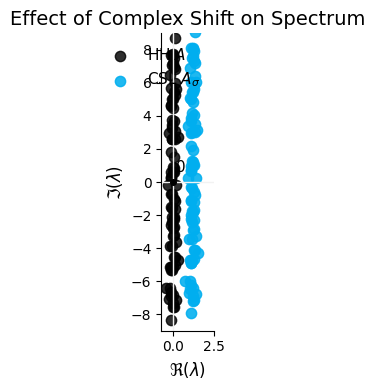

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# TU Delft palette
# -------------------------------------------
TUDELFT_CYAN       = "#00AEEF"
TUDELFT_GREY_LIGHT = "#F2F2F2"

# -------------------------------------------
# Synthetic eigenvalues with better horizontal spread
# -------------------------------------------
np.random.seed(3)
n = 80

# Standard Helmholtz eigenvalues: mostly imaginary, small real parts
imag_std = np.linspace(-8, 8, n) + 0.5 * np.random.randn(n)
real_std = 0.15 * np.random.randn(n)              # more horizontal spread
eigs_std = real_std + 1j * imag_std

# CSL-shifted eigenvalues: large real shift
sigma_real = 1.2
sigma_imag = 0.4
eigs_csl = (real_std + sigma_real) + 1j * (imag_std + sigma_imag)

# -------------------------------------------
# Plot
# -------------------------------------------
fig, ax = plt.subplots(figsize=(7, 4))

# Scatter clouds
ax.scatter(eigs_std.real, eigs_std.imag,
           s=55, color="black", alpha=0.82, label="HH $A$")

ax.scatter(eigs_csl.real, eigs_csl.imag,
           s=55, color=TUDELFT_CYAN, alpha=0.88, label="CSL $A_\\sigma$")

# Axes
ax.axhline(0, color=TUDELFT_GREY_LIGHT, lw=1)
ax.axvline(0, color=TUDELFT_GREY_LIGHT, lw=1)

# Origin dot (small)
ax.plot(0, 0, 'o', color='black', markersize=4)

# Move origin label AWAY from the axes
ax.text(0.18, 0.4, "0",
        fontsize=11, ha="left", va="bottom")

# Labels and title
ax.set_xlabel(r"$\Re(\lambda)$", fontsize=12)
ax.set_ylabel(r"$\Im(\lambda)$", fontsize=12)
ax.set_title("Effect of Complex Shift on Spectrum", fontsize=14)

# Legend
ax.legend(fontsize=11, frameon=False, loc="upper right")

# Aesthetics
ax.set_aspect("equal", "box")
ax.set_xlim(-0.7, 2.5)    # extra breathing room right & left
ax.set_ylim(-9, 9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("complex_shift_spectrum_clean_tudelft.png", dpi=300)
plt.show()


In [3]:
TUDELFT_CYAN = "#00A6D6"   # primary blue/cyan
TUDELFT_DARK = "#0C2340"   # dark blue
TUDELFT_LIGHT = "#80D3EB"  # light cyan
TUDELFT_DGREY = "#5C5C5C"  # dark grey
TUDELFT_LGREY = "#9D9D9D"  # light grey


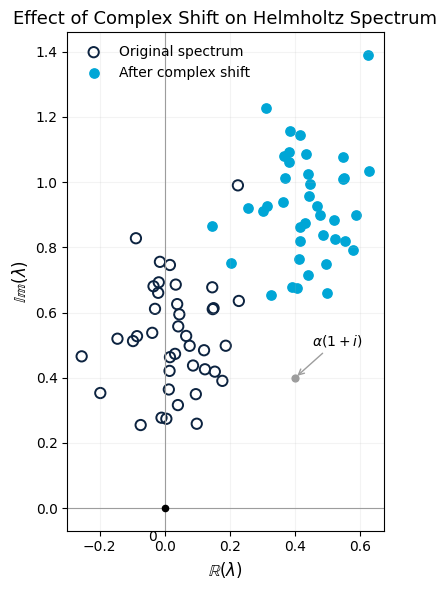

In [2]:
# visual_A_complex_shift_spectrum.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    np.random.seed(0)
    n = 40
    # toy "Helmholtz-like" spectrum: cluster near imaginary axis
    real_part = 0.1 * np.random.randn(n)
    imag_part = 0.6 + 0.2 * np.random.randn(n)
    lam = real_part + 1j * imag_part

    shift = 0.4 + 0.4j   # complex shift
    lam_shifted = lam + shift

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(lam.real, lam.imag, label="Original spectrum",
               edgecolor=TUDELFT_DARK, facecolor="none", s=55, linewidth=1.4)
    ax.scatter(lam_shifted.real, lam_shifted.imag, label="After complex shift",
               color=TUDELFT_CYAN, s=45)

    # emphasise origin and shift
    ax.scatter([0], [0], color="black", s=20, zorder=5)
    ax.scatter([shift.real], [shift.imag],
               color=TUDELFT_LGREY, s=24, zorder=4)
    ax.annotate("0", xy=(0, 0), xytext=(-0.05, -0.1), fontsize=10)
    ax.annotate(r"$\alpha(1+i)$", xy=(shift.real, shift.imag),
                xytext=(shift.real+0.05, shift.imag+0.1),
                arrowprops=dict(arrowstyle="->", color=TUDELFT_LGREY),
                fontsize=10)

    ax.axvline(0, color=TUDELFT_LGREY, linewidth=0.8)
    ax.axhline(0, color=TUDELFT_LGREY, linewidth=0.8)

    ax.set_xlabel(r"$\mathbb{R}(\lambda)$", fontsize=12)
    ax.set_ylabel(r"$\mathbb{Im}(\lambda)$", fontsize=12)
    ax.set_title("Effect of Complex Shift on Helmholtz Spectrum", fontsize=13)
    ax.legend(frameon=False, fontsize=10, loc="upper left")
    ax.set_aspect("equal", "box")
    ax.grid(alpha=0.15)

    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


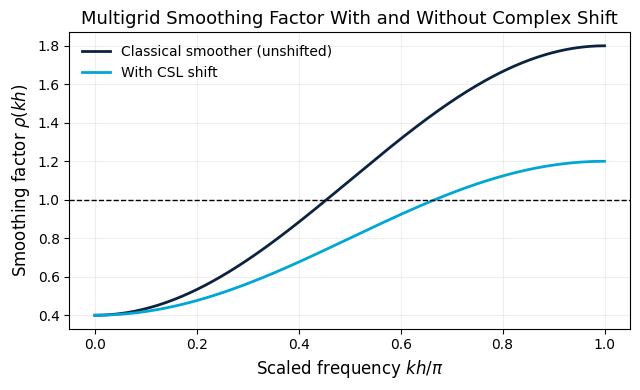

In [6]:
# visual_B_mg_smoothing_shifted_vs_unshifted.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def smoothing_factor(kh, shift=False):
    """
    Toy smoothing factor rho(kh). For demonstration only.
    Unshifted: resonance around kh ≈ pi/2.
    Shifted: uniformly damped.
    """
    if not shift:
        return 1.1 - 0.7 * np.cos(kh)  # >1 near certain frequencies
    else:
        return 0.8 - 0.4 * np.cos(kh)  # <1 everywhere

def main():
    kh = np.linspace(0, np.pi, 400)
    rho_un = smoothing_factor(kh, shift=False)
    rho_sh = smoothing_factor(kh, shift=True)

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(kh/np.pi, rho_un, label="Classical smoother (unshifted)",
            color=TUDELFT_DARK, linewidth=2)
    ax.plot(kh/np.pi, rho_sh, label="With CSL shift",
            color=TUDELFT_CYAN, linewidth=2)

    ax.axhline(1.0, color="k", linestyle="--", linewidth=1)
    ax.set_xlabel(r"Scaled frequency $k h / \pi$", fontsize=12)
    ax.set_ylabel(r"Smoothing factor $\rho(kh)$", fontsize=12)
    ax.set_title("Multigrid Smoothing Factor With and Without Complex Shift",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(alpha=0.2)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


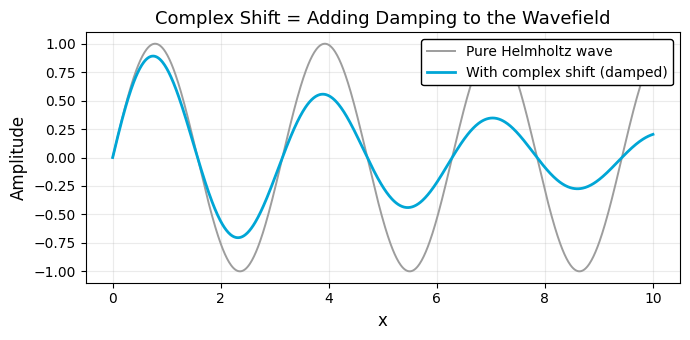

In [3]:
# visual_C_damped_wave_cartoon.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    x = np.linspace(0, 10, 800)
    k = 2.0
    alpha = 0.15

    undamped = np.sin(k * x)
    damped = np.exp(-alpha * x) * np.sin(k * x)

    fig, ax = plt.subplots(figsize=(7, 3.5))
    ax.plot(x, undamped, color=TUDELFT_LGREY, linewidth=1.4,
            label="Pure Helmholtz wave")
    ax.plot(x, damped, color=TUDELFT_CYAN, linewidth=2,
            label="With complex shift (damped)")

    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("Amplitude", fontsize=12)
    ax.set_title("Complex Shift = Adding Damping to the Wavefield", fontsize=13)

    # --- OPAQUE LEGEND BOX (improved readability) ---
    ax.legend(
        fontsize=10,
        loc="upper right",
        frameon=True,
        facecolor="white",   # opaque white background
        edgecolor="black",   # subtle border for clarity
        framealpha=1.0       # fully non-transparent
    )

    ax.grid(alpha=0.25)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


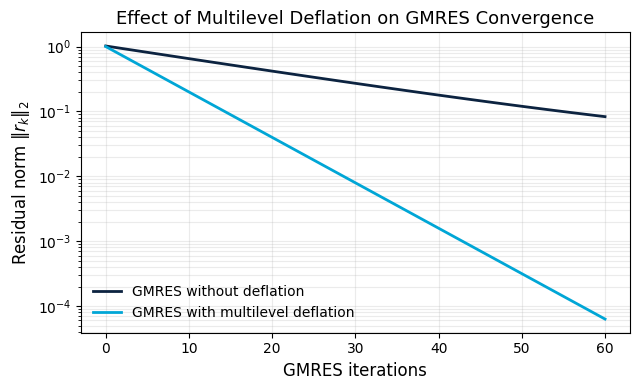

In [8]:
# visual_D_gmres_stagnation_deflation.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def main():
    it = np.arange(0, 61)

    # synthetic residual curves (log-scale behaviour)
    res_plain = 10**(-0.02 * it) + 0.02  # stagnates
    res_defl  = 10**(-0.07 * it)          # steady decay

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.semilogy(it, res_plain, color=TUDELFT_DARK, linewidth=2,
                label="GMRES without deflation")
    ax.semilogy(it, res_defl, color=TUDELFT_CYAN, linewidth=2,
                label="GMRES with multilevel deflation")

    ax.set_xlabel("GMRES iterations", fontsize=12)
    ax.set_ylabel(r"Residual norm $\|r_k\|_2$", fontsize=12)
    ax.set_title("Effect of Multilevel Deflation on GMRES Convergence",
                 fontsize=13)
    ax.grid(which="both", alpha=0.25)
    ax.legend(frameon=False, fontsize=10)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


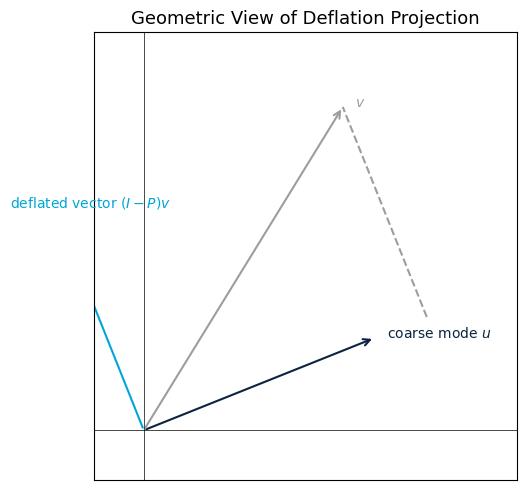

In [9]:
# visual_E_deflation_projection_geometry.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def arrow(ax, start, end, **kwargs):
    ax.add_patch(FancyArrowPatch(start, end,
                                 arrowstyle="->",
                                 mutation_scale=12,
                                 linewidth=1.5,
                                 **kwargs))

def main():
    fig, ax = plt.subplots(figsize=(5.5, 5))

    # Coarse subspace direction
    u = np.array([1.0, 0.4])
    u /= np.linalg.norm(u)

    # Vector v to be deflated
    v = np.array([0.8, 1.3])

    # Projection of v on span(u)
    v_par = np.dot(v, u) * u
    v_perp = v - v_par

    # Draw basis and vectors
    arrow(ax, (0, 0), u, color=TUDELFT_DARK)
    arrow(ax, (0, 0), v, color=TUDELFT_LGREY)
    arrow(ax, (0, 0), v_perp, color=TUDELFT_CYAN)

    # parallelogram
    ax.plot([v_par[0], v[0]], [v_par[1], v[1]],
            linestyle="--", color=TUDELFT_LGREY)

    ax.text(u[0]+0.05, u[1], r"coarse mode $u$", color=TUDELFT_DARK)
    ax.text(v[0]+0.05, v[1], r"$v$", color=TUDELFT_LGREY)
    ax.text(v_perp[0]-0.2, v_perp[1]+0.05,
            r"deflated vector $(I-P)v$", color=TUDELFT_CYAN)

    ax.set_xlim(-0.2, 1.5)
    ax.set_ylim(-0.2, 1.6)
    ax.set_aspect("equal", "box")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Geometric View of Deflation Projection", fontsize=13)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


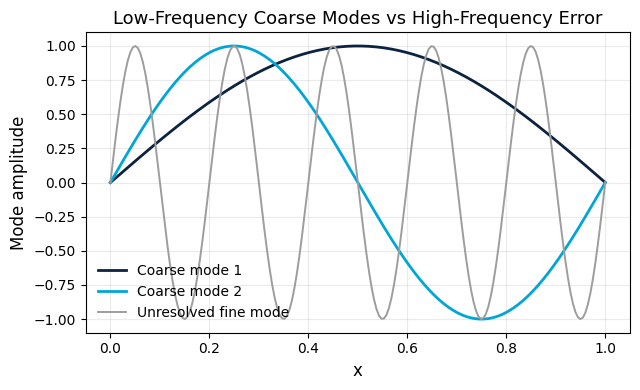

In [10]:
# visual_F_coarse_modes_vs_fine_mode.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    x = np.linspace(0, 1, 200)
    coarse1 = np.sin(np.pi * x)
    coarse2 = np.sin(2 * np.pi * x)
    fine    = np.sin(10 * np.pi * x)

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(x, coarse1, color=TUDELFT_DARK, linewidth=2,
            label="Coarse mode 1")
    ax.plot(x, coarse2, color=TUDELFT_CYAN, linewidth=2,
            label="Coarse mode 2")
    ax.plot(x, fine, color=TUDELFT_LGREY, linewidth=1.4,
            label="Unresolved fine mode")

    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("Mode amplitude", fontsize=12)
    ax.set_title("Low-Frequency Coarse Modes vs High-Frequency Error",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(alpha=0.25)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


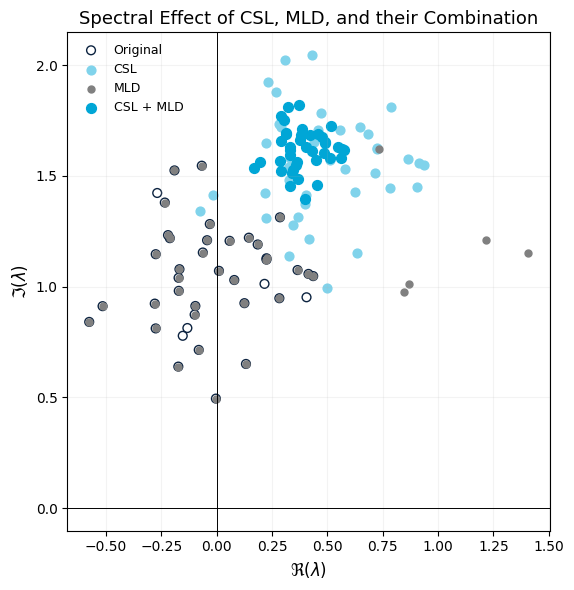

In [11]:
# visual_G_spectrum_csl_mld_combined.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LIGHT = "#80D3EB"

def make_cloud(center, spread, n):
    real = center[0] + spread * np.random.randn(n)
    imag = center[1] + spread * np.random.randn(n)
    return real + 1j * imag

def main():
    np.random.seed(1)
    n = 40
    base = make_cloud((0.0, 1.0), 0.25, n)
    csl = base + (0.5 + 0.5j)
    mld = base.copy()
    mld[:5] += 1.0 + 0.2j   # "removed" isolated modes
    csl_mld = csl + 0.0     # same shift but tightened spread
    csl_mld = (csl_mld.real*0.4 + 0.2) + 1j*(csl_mld.imag*0.4 + 1.0)

    fig, ax = plt.subplots(figsize=(6.5, 6))
    ax.scatter(base.real, base.imag, facecolor="none", edgecolor=TUDELFT_DARK,
               s=40, label="Original")
    ax.scatter(csl.real, csl.imag, color=TUDELFT_LIGHT, s=40,
               label="CSL")
    ax.scatter(mld.real, mld.imag, color="grey", s=25,
               label="MLD")
    ax.scatter(csl_mld.real, csl_mld.imag, color=TUDELFT_CYAN, s=50,
               label="CSL + MLD")

    ax.axvline(0, color="black", linewidth=0.7)
    ax.axhline(0, color="black", linewidth=0.7)
    ax.set_xlabel(r"$\Re(\lambda)$", fontsize=12)
    ax.set_ylabel(r"$\Im(\lambda)$", fontsize=12)
    ax.set_title("Spectral Effect of CSL, MLD, and their Combination",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=9, loc="upper left")
    ax.grid(alpha=0.15)
    ax.set_aspect("equal", "box")
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


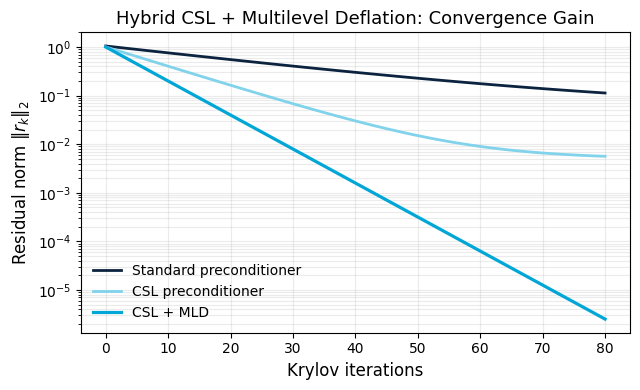

In [12]:
# visual_H_convergence_standard_csl_cslmld.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LIGHT = "#80D3EB"

def main():
    it = np.arange(0, 81)
    res_plain = 10**(-0.015*it) + 0.05
    res_csl   = 10**(-0.04 *it) + 0.005
    res_combo = 10**(-0.07 *it)

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.semilogy(it, res_plain, color=TUDELFT_DARK, linewidth=2,
                label="Standard preconditioner")
    ax.semilogy(it, res_csl, color=TUDELFT_LIGHT, linewidth=2,
                label="CSL preconditioner")
    ax.semilogy(it, res_combo, color=TUDELFT_CYAN, linewidth=2.3,
                label="CSL + MLD")

    ax.set_xlabel("Krylov iterations", fontsize=12)
    ax.set_ylabel(r"Residual norm $\|r_k\|_2$", fontsize=12)
    ax.set_title("Hybrid CSL + Multilevel Deflation: Convergence Gain",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(which="both", alpha=0.25)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


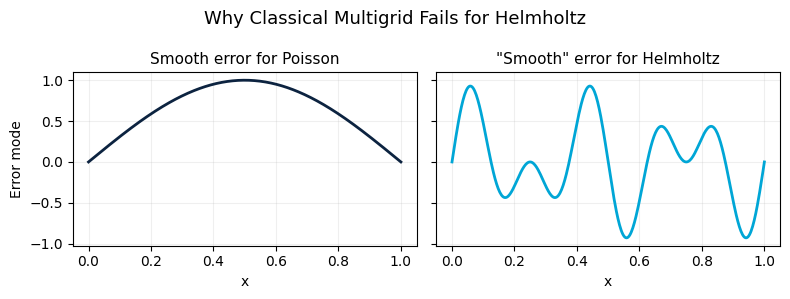

In [13]:
# visual_I_mg_error_modes_helmholtz.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    x = np.linspace(0, 1, 400)
    smooth_poisson = np.sin(np.pi * x)
    smooth_helmholtz = np.sin(8 * np.pi * x) * np.cos(2 * np.pi * x)

    fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

    axes[0].plot(x, smooth_poisson, color=TUDELFT_DARK, linewidth=2)
    axes[0].set_title("Smooth error for Poisson", fontsize=11)
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("Error mode")
    axes[0].grid(alpha=0.2)

    axes[1].plot(x, smooth_helmholtz, color=TUDELFT_CYAN, linewidth=2)
    axes[1].set_title("\"Smooth\" error for Helmholtz", fontsize=11)
    axes[1].set_xlabel("x")
    axes[1].grid(alpha=0.2)

    fig.suptitle("Why Classical Multigrid Fails for Helmholtz", fontsize=13)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


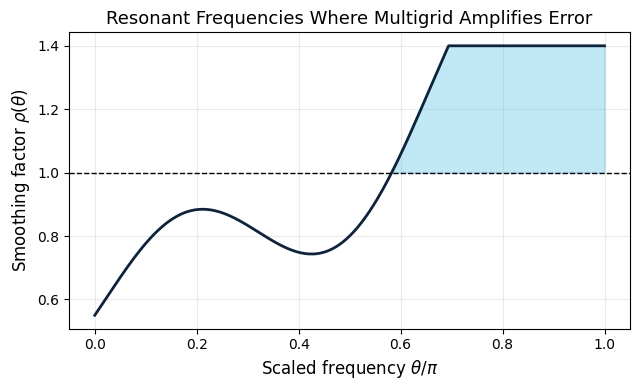

In [14]:
# visual_J_smoothing_factor_vs_frequency.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def main():
    theta = np.linspace(0, np.pi, 400)
    rho = 1.05 + 0.25 * np.sin(3*theta) - 0.5 * np.cos(theta)
    rho = np.clip(rho, 0.4, 1.4)

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(theta/np.pi, rho, color=TUDELFT_DARK, linewidth=2)
    ax.axhline(1.0, color="k", linestyle="--", linewidth=1)
    ax.fill_between(theta/np.pi, 1.0, rho, where=(rho>1.0),
                    color=TUDELFT_CYAN, alpha=0.25)

    ax.set_xlabel(r"Scaled frequency $\theta/\pi$", fontsize=12)
    ax.set_ylabel(r"Smoothing factor $\rho(\theta)$", fontsize=12)
    ax.set_title("Resonant Frequencies Where Multigrid Amplifies Error",
                 fontsize=13)
    ax.grid(alpha=0.25)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


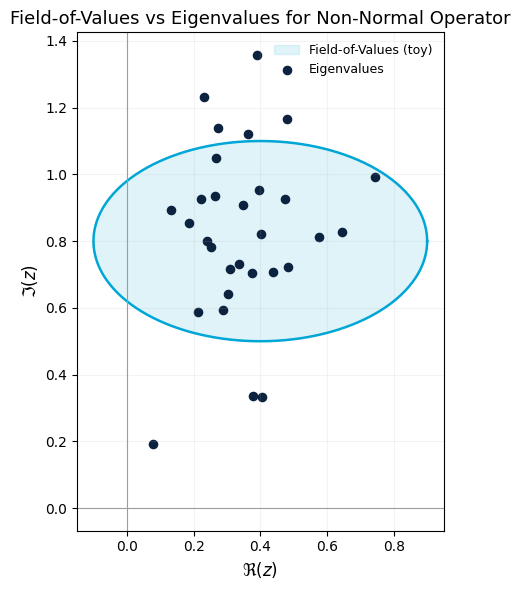

In [15]:
# visual_K_field_of_values_ellipse.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    np.random.seed(2)
    n = 30
    # non-normal eigenvalues as toy data
    eigs = (0.4 + 0.15*np.random.randn(n)) + 1j*(0.8 + 0.25*np.random.randn(n))

    # simple ellipse approximating FOV
    t = np.linspace(0, 2*np.pi, 400)
    a, b = 0.5, 0.3
    center = (0.4, 0.8)
    x_fov = center[0] + a * np.cos(t)
    y_fov = center[1] + b * np.sin(t)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.fill(x_fov, y_fov, color=TUDELFT_LIGHT, alpha=0.25,
            label="Field-of-Values (toy)")
    ax.plot(x_fov, y_fov, color=TUDELFT_CYAN, linewidth=1.8)

    ax.scatter(eigs.real, eigs.imag, color=TUDELFT_DARK, s=35,
               label="Eigenvalues")

    ax.axvline(0, color=TUDELFT_LGREY, linewidth=0.8)
    ax.axhline(0, color=TUDELFT_LGREY, linewidth=0.8)
    ax.set_xlabel(r"$\Re(z)$", fontsize=12)
    ax.set_ylabel(r"$\Im(z)$", fontsize=12)
    ax.set_title("Field-of-Values vs Eigenvalues for Non-Normal Operator",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=9)
    ax.set_aspect("equal", "box")
    ax.grid(alpha=0.15)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


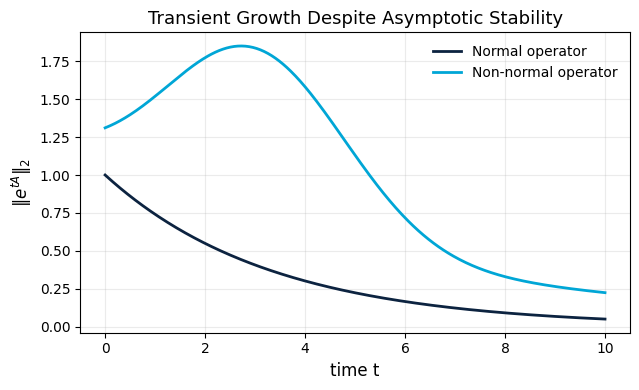

In [16]:
# visual_L_transient_growth_non_normal.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def main():
    t = np.linspace(0, 10, 400)
    # Norm of e^{tA} for normal vs non-normal (synthetic)
    normal  = np.exp(-0.3*t)
    bump = np.exp(-0.15*(t-3)**2)
    nonnorm = np.exp(-0.15*t) + 1.2*bump

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(t, normal, color=TUDELFT_DARK, linewidth=2,
            label="Normal operator")
    ax.plot(t, nonnorm, color=TUDELFT_CYAN, linewidth=2,
            label="Non-normal operator")

    ax.set_xlabel("time t", fontsize=12)
    ax.set_ylabel(r"$\|e^{tA}\|_2$", fontsize=12)
    ax.set_title("Transient Growth Despite Asymptotic Stability", fontsize=13)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(alpha=0.25)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


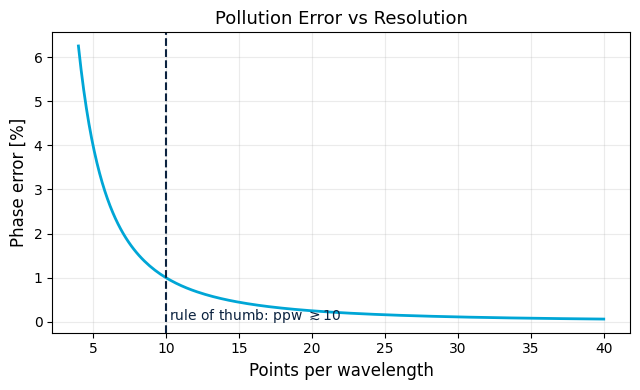

In [17]:
# visual_M_phase_error_vs_ppw.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def main():
    ppw = np.linspace(4, 40, 200)
    phase_error = 100 * (1/ppw**2)  # toy: ~O(h^2)

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(ppw, phase_error, color=TUDELFT_CYAN, linewidth=2)
    ax.set_xlabel("Points per wavelength", fontsize=12)
    ax.set_ylabel("Phase error [%]", fontsize=12)
    ax.set_title("Pollution Error vs Resolution", fontsize=13)
    ax.grid(alpha=0.25)
    ax.axvline(10, color=TUDELFT_DARK, linestyle="--", linewidth=1.5)
    ax.text(10.2, phase_error[-1]*0.8,
            r"rule of thumb: ppw $\gtrsim 10$", fontsize=10,
            color=TUDELFT_DARK)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


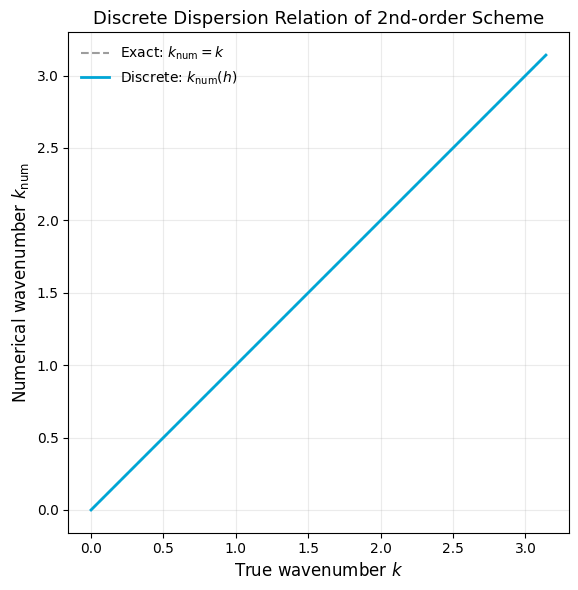

In [18]:
# visual_N_dispersion_curve_knum_vs_k.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    k = np.linspace(0, np.pi, 400)
    # toy discrete dispersion: k_num slightly smaller than k
    knum = 2*np.arcsin(np.sin(k/2))   # for 1D 2nd-order Laplacian

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(k, k, color=TUDELFT_LGREY, linestyle="--", linewidth=1.5,
            label=r"Exact: $k_{\mathrm{num}} = k$")
    ax.plot(k, knum, color=TUDELFT_CYAN, linewidth=2,
            label=r"Discrete: $k_{\mathrm{num}}(h)$")

    ax.set_xlabel(r"True wavenumber $k$", fontsize=12)
    ax.set_ylabel(r"Numerical wavenumber $k_{\mathrm{num}}$", fontsize=12)
    ax.set_title("Discrete Dispersion Relation of 2nd-order Scheme",
                 fontsize=13)
    ax.legend(frameon=False, fontsize=10, loc="upper left")
    ax.grid(alpha=0.25)
    ax.set_aspect("equal", "box")
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


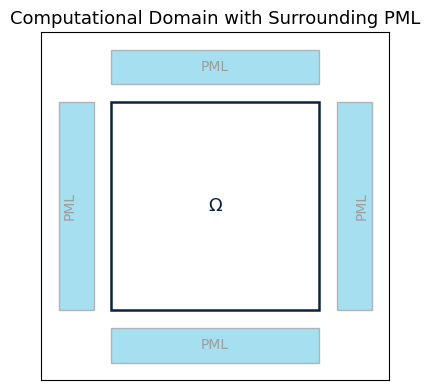

In [19]:
# visual_O_pml_schematic.py
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LIGHT = "#80D3EB"
TUDELFT_LGREY = "#9D9D9D"

def main():
    fig, ax = plt.subplots(figsize=(6, 4))

    # domain and PML layers
    ax.add_patch(Rectangle((0.2, 0.2), 0.6, 0.6,
                           edgecolor=TUDELFT_DARK, facecolor="white",
                           linewidth=1.8))
    ax.text(0.5, 0.5, r"$\Omega$", ha="center", va="center",
            fontsize=13, color=TUDELFT_DARK)

    for x in [0.05, 0.85]:
        ax.add_patch(Rectangle((x, 0.2), 0.1, 0.6,
                               edgecolor=TUDELFT_LGREY,
                               facecolor=TUDELFT_LIGHT, alpha=0.7))
    for y in [0.05, 0.85]:
        ax.add_patch(Rectangle((0.2, y), 0.6, 0.1,
                               edgecolor=TUDELFT_LGREY,
                               facecolor=TUDELFT_LIGHT, alpha=0.7))

    ax.text(0.5, 0.9, "PML", ha="center", va="center",
            fontsize=10, color=TUDELFT_LGREY)
    ax.text(0.5, 0.1, "PML", ha="center", va="center",
            fontsize=10, color=TUDELFT_LGREY)
    ax.text(0.08, 0.5, "PML", ha="center", va="center",
            fontsize=10, rotation=90, color=TUDELFT_LGREY)
    ax.text(0.92, 0.5, "PML", ha="center", va="center",
            fontsize=10, rotation=90, color=TUDELFT_LGREY)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal", "box")
    ax.set_title("Computational Domain with Surrounding PML", fontsize=13)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


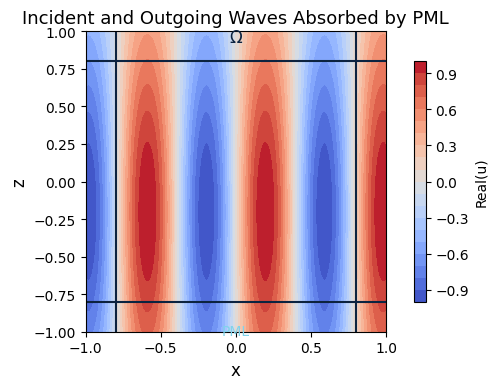

In [20]:
# visual_P_incoming_outgoing_waves.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LIGHT = "#80D3EB"

def main():
    x = np.linspace(-1, 1, 300)
    z = np.linspace(-1, 1, 300)
    X, Z = np.meshgrid(x, z)

    k = 8.0
    field = np.sin(k*X) * np.exp(-0.5*(Z+0.2)**2)

    fig, ax = plt.subplots(figsize=(6, 4))
    im = ax.contourf(X, Z, field, levels=20, cmap="coolwarm")

    # approximate boundaries
    ax.axvline(0.8, color=TUDELFT_DARK, linewidth=1.5)
    ax.axvline(-0.8, color=TUDELFT_DARK, linewidth=1.5)
    ax.axhline(0.8, color=TUDELFT_DARK, linewidth=1.5)
    ax.axhline(-0.8, color=TUDELFT_DARK, linewidth=1.5)

    ax.text(0, 0.9, r"$\Omega$", ha="center", va="bottom",
            fontsize=12, color=TUDELFT_DARK)
    ax.text(0, -0.95, "PML", ha="center", va="top",
            fontsize=10, color=TUDELFT_LIGHT)

    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("z", fontsize=12)
    ax.set_title("Incident and Outgoing Waves Absorbed by PML", fontsize=13)
    fig.colorbar(im, ax=ax, shrink=0.8, label="Real(u)")
    ax.set_aspect("equal", "box")
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


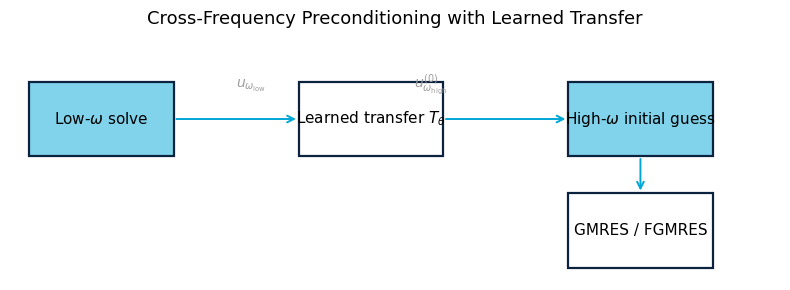

In [21]:
# visual_Q_cross_frequency_pipeline.py
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LIGHT = "#80D3EB"
TUDELFT_LGREY = "#9D9D9D"

def box(ax, xy, text, width=1.5, height=0.6, facecolor="white"):
    rect = Rectangle(xy, width, height,
                     linewidth=1.6, edgecolor=TUDELFT_DARK,
                     facecolor=facecolor)
    ax.add_patch(rect)
    ax.text(xy[0]+width/2, xy[1]+height/2, text,
            ha="center", va="center", fontsize=11)

def arrow(ax, start, end):
    ax.add_patch(FancyArrowPatch(start, end,
                                 arrowstyle="->",
                                 mutation_scale=12,
                                 linewidth=1.4,
                                 color=TUDELFT_CYAN))

def main():
    fig, ax = plt.subplots(figsize=(8, 3))

    box(ax, (0.2, 1.0), r"Low-$\omega$ solve", facecolor=TUDELFT_LIGHT)
    box(ax, (3.0, 1.0), r"Learned transfer $T_\theta$")
    box(ax, (5.8, 1.0), r"High-$\omega$ initial guess",
        facecolor=TUDELFT_LIGHT)
    box(ax, (5.8, 0.1), r"GMRES / FGMRES", facecolor="white")

    arrow(ax, (1.7, 1.3), (3.0, 1.3))
    arrow(ax, (4.5, 1.3), (5.8, 1.3))
    arrow(ax, (6.55, 1.0), (6.55, 0.7))

    ax.text(2.35, 1.55, r"$u_{\omega_{\text{low}}}$", fontsize=10,
            color=TUDELFT_LGREY)
    ax.text(4.2, 1.55, r"$u_{\omega_{\text{high}}}^{(0)}$", fontsize=10,
            color=TUDELFT_LGREY)

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 2)
    ax.axis("off")
    ax.set_title("Cross-Frequency Preconditioning with Learned Transfer",
                 fontsize=13)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


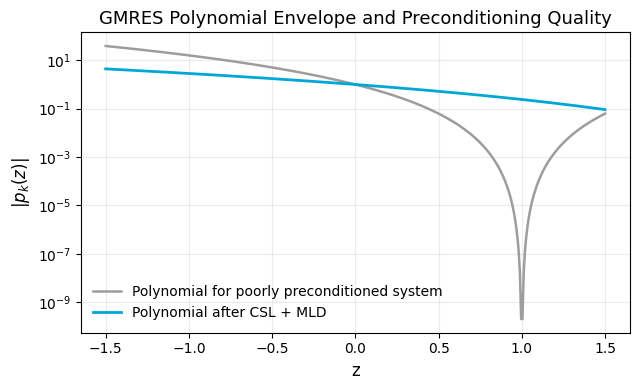

In [22]:
# visual_R_gmres_polynomial_envelope.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"
TUDELFT_LGREY = "#9D9D9D"

def main():
    z = np.linspace(-1.5, 1.5, 400)
    # toy "bad" polynomial (roots near 1)
    p_bad = (1 - z)**4
    # "good" polynomial (roots clustered near eigenvalues)
    p_good = (1 - 0.3*z)**4

    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(z, np.abs(p_bad), color=TUDELFT_LGREY, linewidth=1.8,
            label="Polynomial for poorly preconditioned system")
    ax.plot(z, np.abs(p_good), color=TUDELFT_CYAN, linewidth=2,
            label="Polynomial after CSL + MLD")

    ax.set_yscale("log")
    ax.set_xlabel("z", fontsize=12)
    ax.set_ylabel(r"$|p_k(z)|$", fontsize=12)
    ax.set_title("GMRES Polynomial Envelope and Preconditioning Quality",
                 fontsize=13)
    ax.grid(which="both", alpha=0.25)
    ax.legend(frameon=False, fontsize=10)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


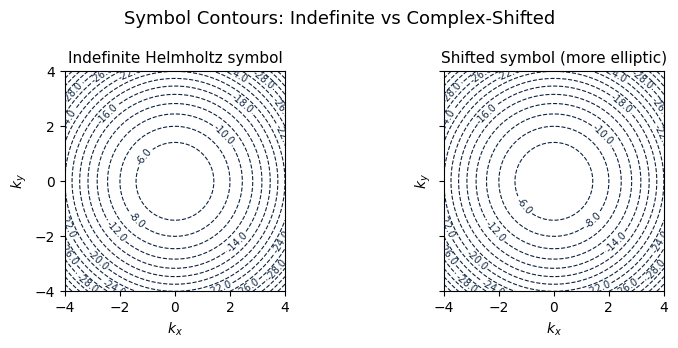

In [23]:
# visual_S_symbol_contours_elliptic_vs_indefinite.py
import numpy as np
import matplotlib.pyplot as plt

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def helmholtz_symbol(kx, ky, k0):
    return -(kx**2 + ky**2) - k0**2

def shifted_symbol(kx, ky, k0, sigma):
    return -(kx**2 + ky**2) - (k0**2 * (1 + 1j*sigma))

def plot_symbol(ax, k0, sigma=None, title=""):
    k = np.linspace(-2*k0, 2*k0, 300)
    KX, KY = np.meshgrid(k, k)
    if sigma is None:
        sym = helmholtz_symbol(KX, KY, k0)
        val = sym
    else:
        sym = shifted_symbol(KX, KY, k0, sigma)
        val = sym.real

    cs = ax.contour(KX, KY, val, levels=15, linewidths=0.8,
                    colors=TUDELFT_DARK)
    ax.clabel(cs, inline=True, fontsize=7, fmt="%.1f")
    ax.set_xlabel(r"$k_x$")
    ax.set_ylabel(r"$k_y$")
    ax.set_title(title, fontsize=11)
    ax.set_aspect("equal", "box")

def main():
    fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharex=True, sharey=True)
    k0 = 2.0
    plot_symbol(axes[0], k0, sigma=None,
                title="Indefinite Helmholtz symbol")
    plot_symbol(axes[1], k0, sigma=0.5,
                title="Shifted symbol (more elliptic)")

    fig.suptitle("Symbol Contours: Indefinite vs Complex-Shifted", fontsize=13)
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


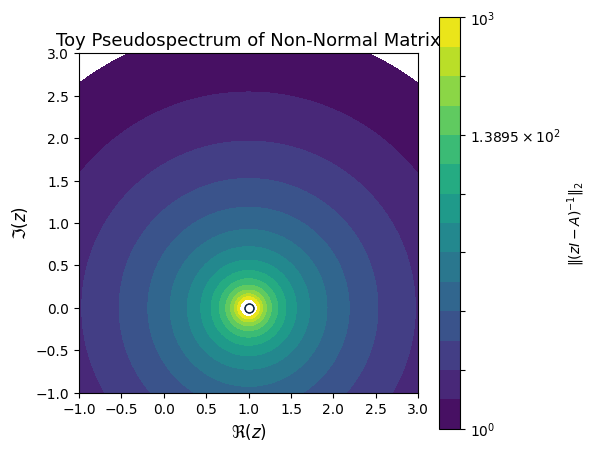

In [24]:
# visual_T_pseudospectrum_heatmap.py
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

TUDELFT_CYAN = "#00A6D6"
TUDELFT_DARK = "#0C2340"

def pseudospectrum(A, xlim=(-1, 3), ylim=(0, 2), n=200):
    xs = np.linspace(*xlim, n)
    ys = np.linspace(*ylim, n)
    X, Y = np.meshgrid(xs, ys)
    Z = X + 1j*Y
    vals = np.zeros_like(X, dtype=float)

    I = np.eye(A.shape[0], dtype=complex)
    for i in range(n):
        for j in range(n):
            M = Z[i, j]*I - A
            smin = svd(M, compute_uv=False)[-1]
            vals[i, j] = 1.0 / smin
    return X, Y, vals

def main():
    # simple non-normal 2x2 matrix
    A = np.array([[1.0, 10.0],
                  [0.0, 1.0]])

    X, Y, V = pseudospectrum(A, xlim=(-1, 3), ylim=(-1, 3), n=120)

    fig, ax = plt.subplots(figsize=(6, 5))
    levels = np.logspace(0, 3, 15)
    cs = ax.contourf(X, Y, V, levels=levels, norm="log",
                     cmap="viridis")
    cbar = fig.colorbar(cs, ax=ax)
    cbar.set_label(r"$\|(zI-A)^{-1}\|_2$")

    eigvals = np.linalg.eigvals(A)
    ax.scatter(eigvals.real, eigvals.imag, color="white",
               edgecolor=TUDELFT_DARK, s=40, zorder=5)
    ax.set_xlabel(r"$\Re(z)$", fontsize=12)
    ax.set_ylabel(r"$\Im(z)$", fontsize=12)
    ax.set_title("Toy Pseudospectrum of Non-Normal Matrix", fontsize=13)
    ax.set_aspect("equal", "box")
    fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


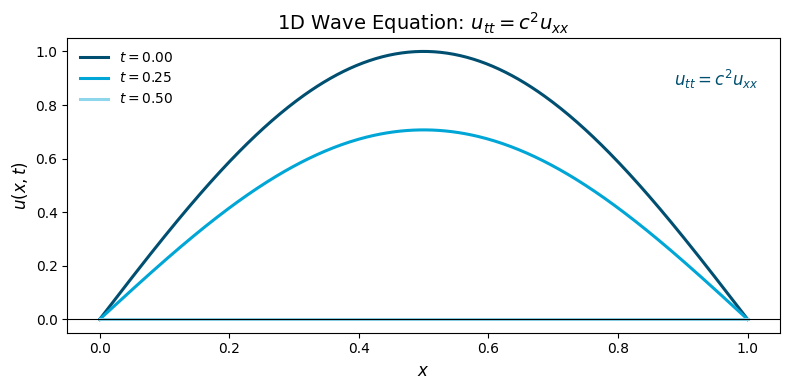

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# TU Delft color palette
TU_BLUE      = "#00A6D6"   # primary Delft Blue
TU_DARKBLUE  = "#004F71"   # dark support blue
TU_LIGHTBLUE = "#8ED6EC"   # light support blue

colors = [TU_DARKBLUE, TU_BLUE, TU_LIGHTBLUE]

# Parameters
L = 1.0          # string length
c = 1.0          # wave speed
x = np.linspace(0, L, 400)

# Times at which we plot the solution
t_values = [0.0, 0.25, 0.5]

plt.figure(figsize=(8, 4))

for t, col in zip(t_values, colors):
    # Mode-1 solution of the 1D wave equation
    u = np.sin(np.pi * x / L) * np.cos(np.pi * c * t / L)
    plt.plot(x, u, label=fr"$t = {t:.2f}$", color=col, linewidth=2.2)

# Axes and labels
plt.axhline(0, linewidth=0.8, color="black")
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$u(x,t)$", fontsize=12)
plt.title(r"1D Wave Equation: $u_{tt} = c^2 u_{xx}$", fontsize=14)

# PDE annotation in the top-right corner
plt.text(
    0.97, 0.9,
    r"$u_{tt} = c^2 u_{xx}$",
    transform=plt.gca().transAxes,
    ha="right", va="top",
    fontsize=12,
    color=TU_DARKBLUE
)

plt.legend(frameon=False)
plt.tight_layout()
plt.show()


### Challenge


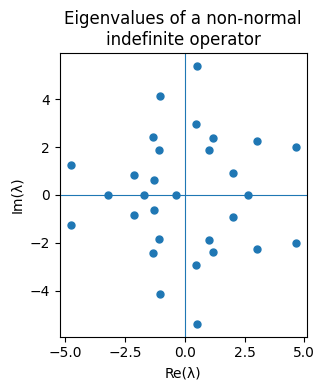

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- construct a non-normal indefinite matrix A ---
np.random.seed(1)
n = 30

# Eigenvalues with mixed signs (indefinite)
D = np.diag(np.concatenate([
    np.linspace(-3.0, -0.2, n // 2),
    np.linspace(0.2,  3.0, n - n // 2)
]))

# Random similarity transform → non-normal
S = np.random.randn(n, n)
A = S @ D @ np.linalg.inv(S)

# Add skew-symmetric part to introduce imaginary components
K = np.random.randn(n, n)
A = A + 0.3 * (K - K.T)

# --- eigenvalues of A ---
lam = np.linalg.eigvals(A)

fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(lam.real, lam.imag, s=25)
ax.axhline(0.0, linewidth=0.8)
ax.axvline(0.0, linewidth=0.8)

ax.set_xlabel("Re(λ)")
ax.set_ylabel("Im(λ)")
ax.set_title("Eigenvalues of a non-normal\nindefinite operator")

ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the matrix A from the previous cell.
# If you run this cell standalone, uncomment the construction of A below.

# np.random.seed(1)
# n = 30
# D = np.diag(np.concatenate([
#     np.linspace(-3.0, -0.2, n // 2),
#     np.linspace(0.2,  3.0, n - n // 2)
# ]))
# S = np.random.randn(n, n)
# A = S @ D @ np.linalg.inv(S)
# K = np.random.randn(n, n)
# A = A + 0.3 * (K - K.T)

n = A.shape[0]

# --- grid in the complex plane ---
xr = np.linspace(-4, 4, 70)
yr = np.linspace(-4, 4, 70)
X, Y = np.meshgrid(xr, yr)
Z = X + 1j * Y

sigma_min = np.zeros_like(X, dtype=float)

# smallest singular value σ_min(zI − A) on the grid
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        z = Z[i, j]
        svals = np.linalg.svd(z * np.eye(n) - A, compute_uv=False)
        sigma_min[i, j] = svals[-1]

# log pseudospectrum: log10(‖(zI − A)^{-1}‖) ≈ log10(1 / σ_min)
eps = 1e-8
values = np.log10(1.0 / (sigma_min + eps))

fig, ax = plt.subplots(figsize=(5, 4))

cs = ax.contourf(X, Y, values, levels=30)
ax.scatter(np.linalg.eigvals(A).real,
           np.linalg.eigvals(A).imag,
           s=10)

ax.set_xlabel("Re(z)")
ax.set_ylabel("Im(z)")
ax.set_title("Pseudospectrum of A\n(log₁₀‖(zI − A)⁻¹‖)")

ax.set_aspect("equal", adjustable="box")
cbar = plt.colorbar(cs, ax=ax)
cbar.set_label(r"$\log_{10}\big(\|(zI - A)^{-1}\|\big)$")

plt.tight_layout()
plt.show()


ValueError: 
\log_{10}\big(\|(zI - A)^{-1}\|\big)
         ^
ParseFatalException: Unknown symbol: \big, found '\'  (at char 9), (line:1, col:10)

Error in callback <function _draw_all_if_interactive at 0x000001CAF3652C00> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
\log_{10}\big(\|(zI - A)^{-1}\|\big)
         ^
ParseFatalException: Unknown symbol: \big, found '\'  (at char 9), (line:1, col:10)

ValueError: 
\log_{10}\big(\|(zI - A)^{-1}\|\big)
         ^
ParseFatalException: Unknown symbol: \big, found '\'  (at char 9), (line:1, col:10)

<Figure size 500x400 with 2 Axes>

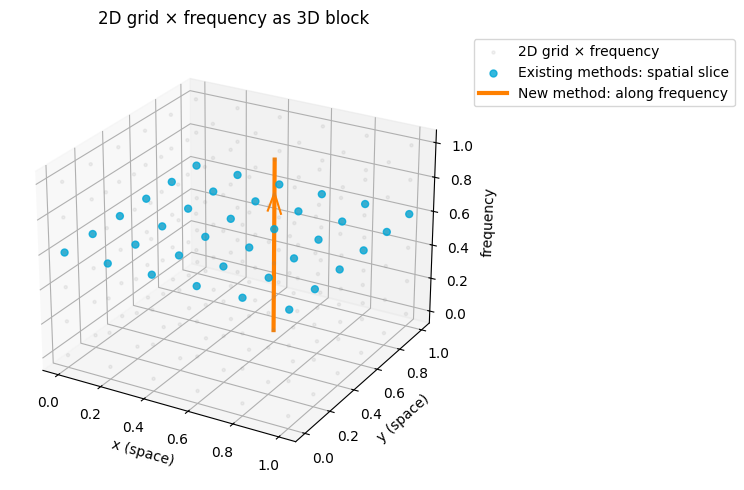

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Optional: TU Delft colors
TU_BLUE      = "#00A6D6"
TU_DARKBLUE  = "#004F71"
TU_LIGHTBLUE = "#8ED6EC"
TU_ORANGE    = "#FF8000"

# ----- Create a simple 2D grid × frequency axis -----
nx, ny, nf = 6, 6, 6                 # coarse grid just for visualization
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
f = np.linspace(0, 1, nf)            # normalized frequency axis

X, Y, F = np.meshgrid(x, y, f, indexing="ij")

# Flatten for scatter plotting
Xf = X.ravel()
Yf = Y.ravel()
Ff = F.ravel()

# ----- Define a frequency slice (existing methods) -----
slice_index = nf // 2                # middle frequency
mask_slice = (np.abs(Ff - f[slice_index]) < 1e-9)

# ----- Define a line along the frequency axis (your method) -----
ix, iy = nx // 2, ny // 2            # central spatial location
x_line = np.full_like(f, x[ix])
y_line = np.full_like(f, y[iy])
f_line = f

# ----- Plot -----
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

# 1) Full 3D block: light gray points
ax.scatter(Xf, Yf, Ff, s=5, alpha=0.1, color="gray", label="2D grid × frequency")

# 2) Highlighted spatial slice (existing methods)
ax.scatter(
    Xf[mask_slice],
    Yf[mask_slice],
    Ff[mask_slice],
    s=25,
    color=TU_BLUE,
    alpha=0.8,
    label="Existing methods: spatial slice"
)

# 3) Highlighted frequency line (your method)
ax.plot(
    x_line, y_line, f_line,
    color=TU_ORANGE,
    linewidth=3,
    label="New method: along frequency"
)

# 4) Arrow along frequency axis at (x*, y*)
ax.quiver(
    x[ix], y[iy], f[0],
    0, 0, 0.9,
    length=0.9,
    arrow_length_ratio=0.15,
    color=TU_ORANGE
)

# Axis labels
ax.set_xlabel("x (space)")
ax.set_ylabel("y (space)")
ax.set_zlabel("frequency")

# Tweak view
ax.view_init(elev=25, azim=-60)

# Title & legend
ax.set_title("2D grid × frequency as 3D block")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))

plt.tight_layout()
plt.show()


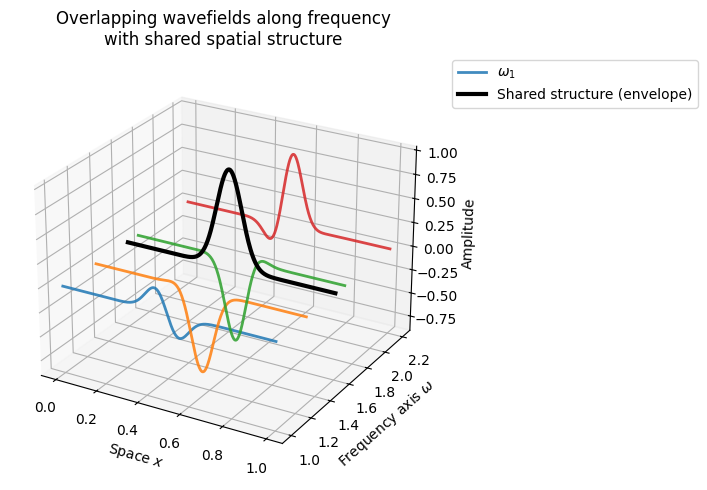

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- Parameters ---
x = np.linspace(0, 1, 400)              # spatial coordinate
freqs = [1.0, 1.3, 1.7, 2.2]            # example normalized frequencies

# Shared structure: same spatial envelope (geometry)
envelope = np.exp(-((x - 0.5) ** 2) / (2 * 0.06 ** 2))

# --- 3D figure: x (space) × f (frequency) × amplitude ---
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot overlapping wavefields along the frequency axis
for i, f in enumerate(freqs):
    wave = envelope * np.sin(2 * np.pi * f * x)
    freq_axis = np.full_like(x, f)

    ax.plot(
        x, freq_axis, wave,
        linewidth=2,
        alpha=0.85,
        label=fr"$\omega_{i+1}$" if i == 0 else None  # only label first in legend
    )

# Highlight shared structure: the common envelope
# Plot it as a "ridge" at a reference frequency (e.g. mid of the band)
f_ref = 0.5 * (min(freqs) + max(freqs))
ax.plot(
    x,
    np.full_like(x, f_ref),
    envelope,
    color="black",
    linewidth=3,
    label="Shared structure (envelope)"
)

# Axes styling
ax.set_xlabel("Space $x$")
ax.set_ylabel("Frequency axis $\\omega$")
ax.set_zlabel("Amplitude")

ax.set_title("Overlapping wavefields along frequency\nwith shared spatial structure")

# Adjust viewing angle for clarity
ax.view_init(elev=25, azim=-60)

# Clean legend (only two conceptual entries)
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))

plt.tight_layout()
plt.show()


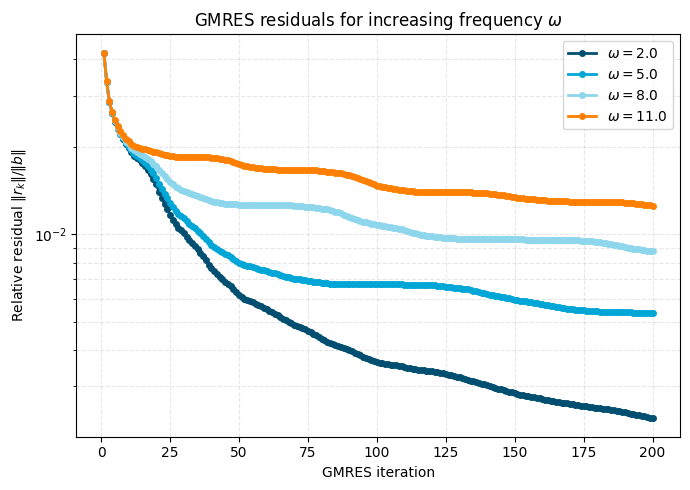

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import gmres

# --- TU Delft colors (optional) ---
TU_BLUE      = "#00A6D6"
TU_DARKBLUE  = "#004F71"
TU_LIGHTBLUE = "#8ED6EC"
TU_ORANGE    = "#FF8000"

# --- Build 1D Laplacian K on [0,1] with Dirichlet BCs ---
n = 200
h = 1.0 / (n + 1)
main_diag = 2.0 * np.ones(n)
off_diag = -1.0 * np.ones(n - 1)
K = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1]) / (h**2)

# --- Frequency parameters ω to test ---
omegas = [2.0, 5.0, 8.0, 11.0]

# Right-hand side
np.random.seed(0)
b = np.random.randn(n)

plt.figure(figsize=(7, 5))

for idx, omega in enumerate(omegas):
    A = K - (omega**2) * diags([np.ones(n)], [0])  # Helmholtz-like

    residuals = []

    def callback(rk):
        # rk is the current residual vector
        residuals.append(np.linalg.norm(rk) / np.linalg.norm(b))

    x0 = np.zeros_like(b)
    x, info = gmres(A, b, x0=x0, callback=callback, rtol=1e-10, restart=50, maxiter=200)

    label = fr"$\omega = {omega:.1f}$"
    color = [TU_DARKBLUE, TU_BLUE, TU_LIGHTBLUE, TU_ORANGE][idx % 4]

    plt.semilogy(
        range(1, len(residuals) + 1),
        residuals,
        marker="o",
        linewidth=2,
        markersize=4,
        label=label,
        color=color
    )

plt.xlabel("GMRES iteration")
plt.ylabel(r"Relative residual $\|r_k\| / \|b\|$")
plt.title("GMRES residuals for increasing frequency $\\omega$")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


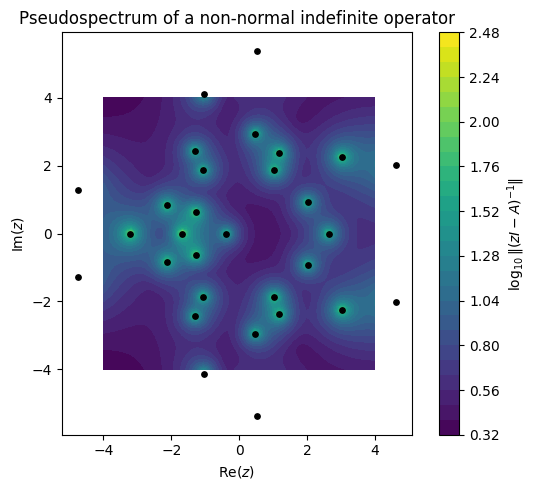

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- Construct a non-normal indefinite matrix A ---
np.random.seed(1)
n = 30

# Eigenvalues with mixed signs (indefinite)
D = np.diag(np.concatenate([
    np.linspace(-3.0, -0.2, n // 2),
    np.linspace(0.2,  3.0, n - n // 2)
]))

# Random similarity transform → non-normal
S = np.random.randn(n, n)
A = S @ D @ np.linalg.inv(S)

# Add skew-symmetric part to introduce imaginary components
K = np.random.randn(n, n)
A = A + 0.3 * (K - K.T)

# --- Grid in the complex plane ---
xr = np.linspace(-4, 4, 80)
yr = np.linspace(-4, 4, 80)
X, Y = np.meshgrid(xr, yr)
Z = X + 1j * Y

sigma_min = np.zeros_like(X, dtype=float)

# Smallest singular value σ_min(zI − A) on the grid
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        z = Z[i, j]
        svals = np.linalg.svd(z * np.eye(n) - A, compute_uv=False)
        sigma_min[i, j] = svals[-1]

# log pseudospectrum: log10(‖(zI − A)^{-1}‖) ≈ log10(1 / σ_min)
eps = 1e-8
values = np.log10(1.0 / (sigma_min + eps))

fig, ax = plt.subplots(figsize=(6, 5))

cs = ax.contourf(X, Y, values, levels=30)
lam = np.linalg.eigvals(A)
ax.scatter(lam.real, lam.imag, s=15, color="black")

ax.set_xlabel(r"Re$(z)$")
ax.set_ylabel(r"Im$(z)$")
ax.set_title("Pseudospectrum of a non-normal indefinite operator")

ax.set_aspect("equal", adjustable="box")

cbar = plt.colorbar(cs, ax=ax)
cbar.set_label(r"$\log_{10}\|(zI - A)^{-1}\|$")

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# eigenvalues of 1D Helmholtz operator
n = 200
x = np.linspace(0, np.pi, n)
lambda_H = 2 - 2*np.cos(x) - k**2  # schematic

# shifted Laplacian
alpha = 0.5
lambda_shifted = 2 - 2*np.cos(x) - (1+alpha)*k**2

plt.scatter(lambda_H.real, lambda_H.imag, label='Original')
plt.scatter(lambda_shifted.real, lambda_shifted.imag, label='Shifted')
plt.axvline(0, color='k')


NameError: name 'k' is not defined